In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
# Import the ColumnDataSource class
from bokeh.models import ColumnDataSource, HoverTool  
import missingno as msno

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

# Set to output the plot in the notebook
output_notebook()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading BokehJS ...

# 1. Exploration des données

## 1.1 Description du dataset

In [96]:
dfOriginel = pd.read_csv('D:/OCR_IA/P3/fr.openfoodfacts.org.products.csv', sep='\t')
dfOriginel

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [97]:
dfOriginel.shape

(320772, 162)

In [98]:
dfOriginel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


On a donc 320 772 enregistrements et 162 colonnes dont 106 variables numériques et 56 variables non numériques.

## 1.2 Un peu de nettoyage

In [99]:
def datacleaning(_df, _col_ref):
    print(_df.shape)
    print("Suppression des éventuels doublons totaux:")
    _df = _df.drop_duplicates()
    print(_df.shape)
    print("Suppression des éventuels doublons sur la feature :"+_col_ref)
    _df.drop_duplicates(subset =_col_ref, keep = 'last', inplace=True)
    print(_df.shape)
    return _df

In [100]:
dfOriginel = datacleaning(dfOriginel, "code")
dfOriginel = dfOriginel.reset_index(drop=True)

(320772, 162)
Suppression des éventuels doublons totaux:
(320772, 162)
Suppression des éventuels doublons sur la feature :code
(320639, 162)


In [101]:
dfOriginel

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

A priori, pas de doublons réels, mais cela ne veut rien dire.<br>
On a par contre, des enregistrements ayant le même code, on ne garde que le dernier.<br>

## 1.3 Répartition des NaN

Pourcentages de NA:

In [102]:
sparse_rate = 100*dfOriginel.isna().mean().sort_values(axis=0, ascending = False)

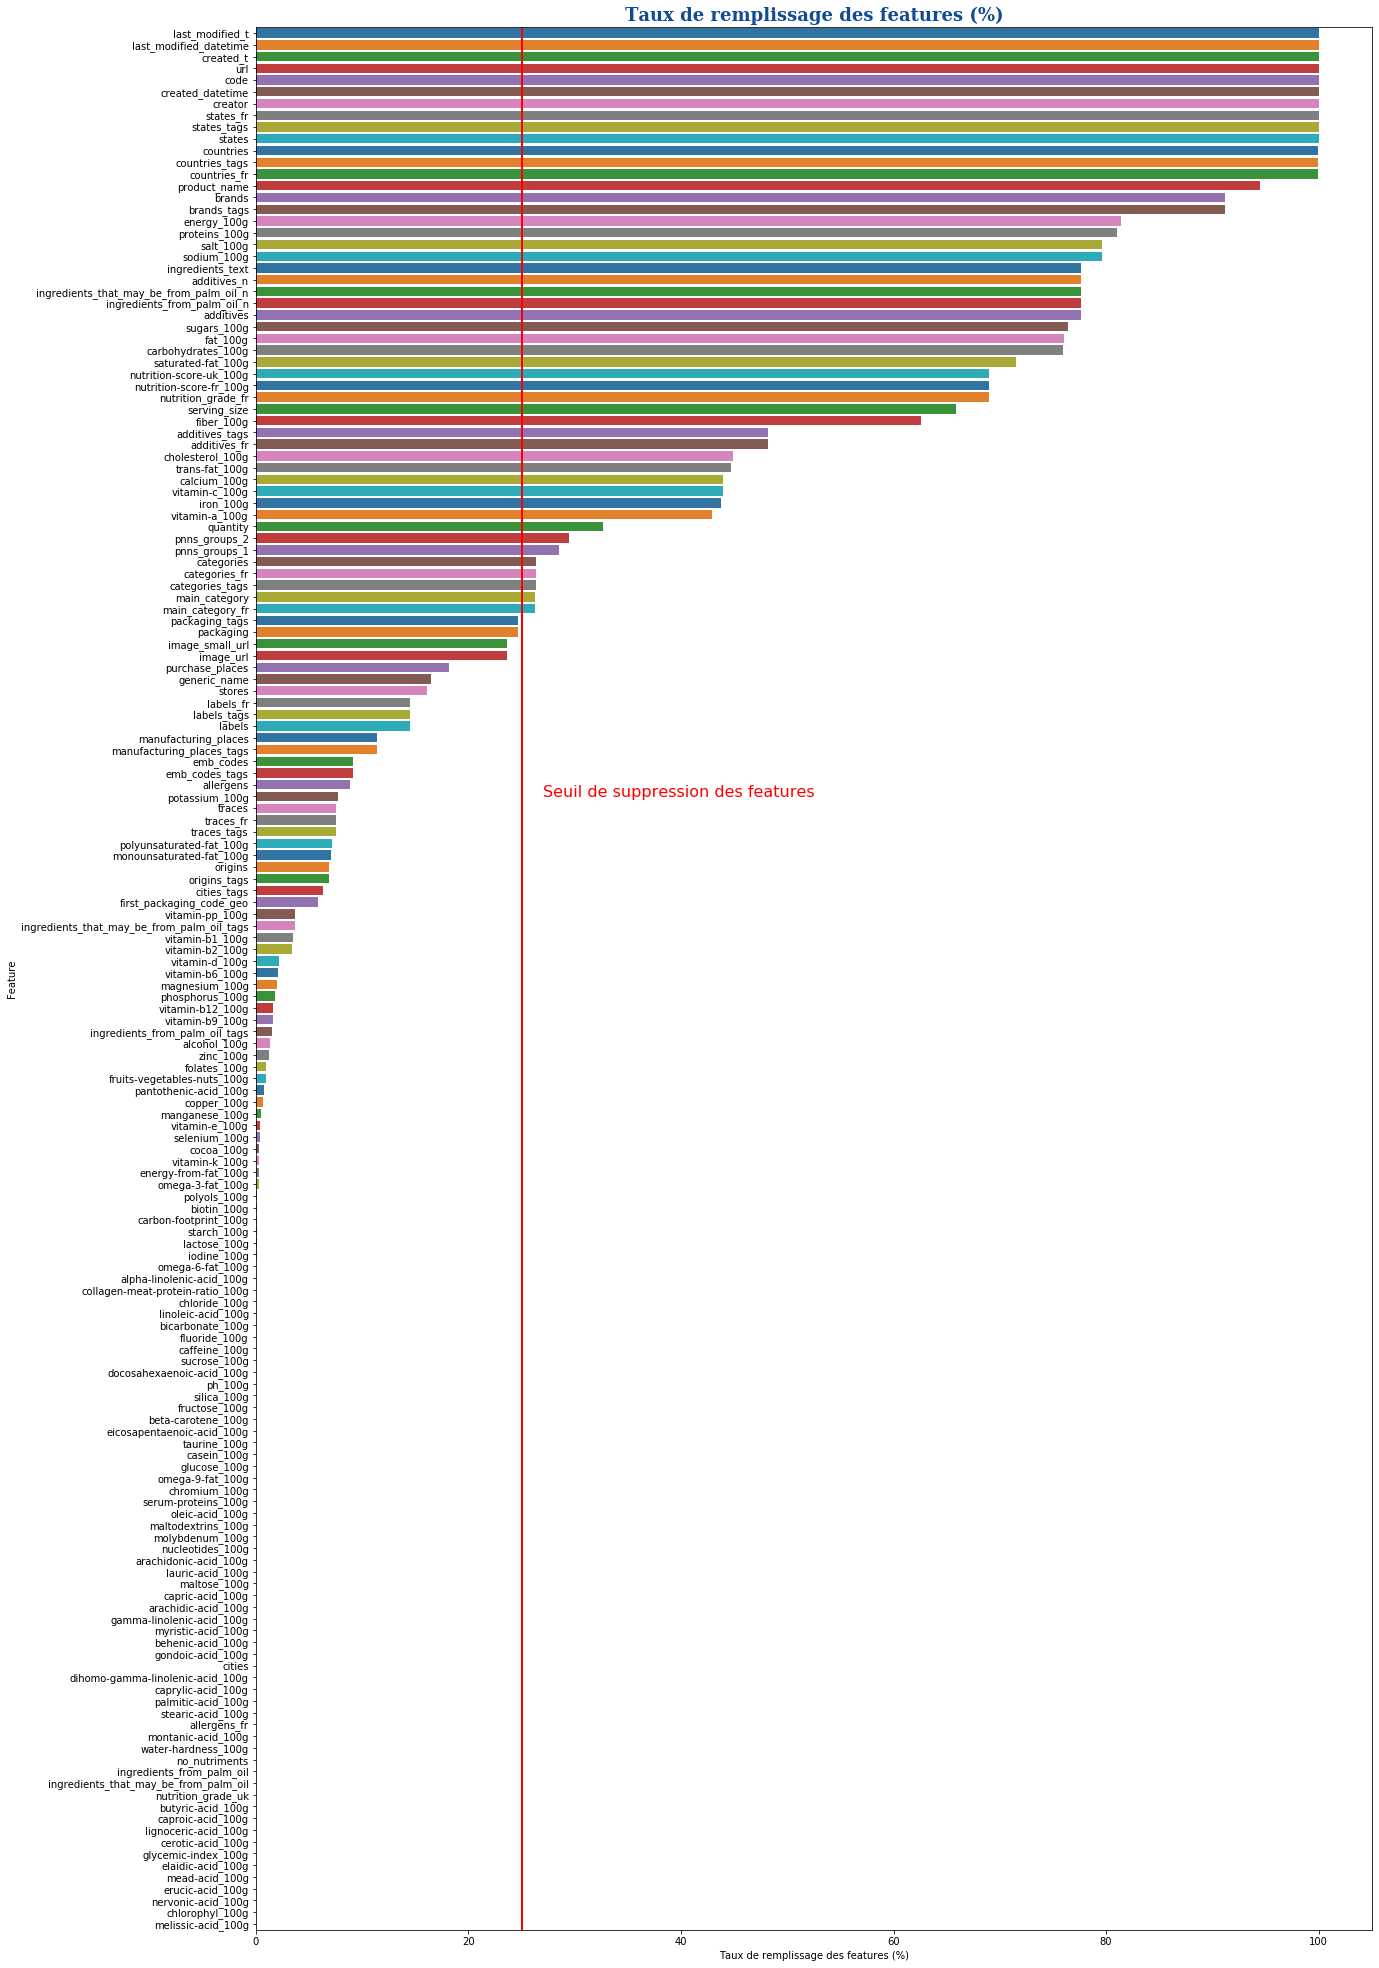

In [103]:
def Nan_Rate(_df, _threshold):
    nan_rate = (100 - _df.isna().mean()*100).sort_values(ascending=False).reset_index()
    nan_rate.columns = ['Feature','Taux_de_NaN']
    high_nan_rate = nan_rate[nan_rate.Taux_de_NaN >= _threshold]
    return high_nan_rate


def draw_Nan_Rate(_df, _threshold, _sup_threshold):
    
    filling_features = Nan_Rate(_df, _threshold)
    
    fig = plt.figure(figsize=(20, 35))

    font_title = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold', 'size': 18}

    sns.barplot(x="Taux_de_NaN", y="Feature", data=filling_features, palette="tab10")
    
    #Seuil pour suppression des features
    plt.axvline(x=_sup_threshold, linewidth=2, color = 'r')
    plt.text(_sup_threshold+2, 65, 'Seuil de suppression des features', fontsize = 16, color = 'r')

    plt.title("Taux de remplissage des features (%)", fontdict=font_title)
    plt.xlabel("Taux de remplissage des features (%)")
    plt.show()

draw_Nan_Rate(dfOriginel, 0, 25)

En étudiant les % de NaN plus précisément par catégorie, on s'apperçoit qu'on ne peut pas "sauver" quelques catégories pour les features peu remplies, car elles sont assez uniformément non remplies...

In [104]:
s = ['potassium_100g','vitamin-b1_100g','copper_100g','zinc_100g']
100*dfOriginel.groupby('pnns_groups_1')[s].agg(lambda x: x.isna().mean())

,potassium_100g,vitamin-b1_100g,copper_100g,zinc_100g
pnns_groups_1,,,,
Beverages,97.630909,98.660467,99.922506,99.634673
Cereals and potatoes,98.957593,93.650794,99.798626,98.590381
Composite foods,99.777679,99.970357,100.000000,99.985179
Fat and sauces,99.827388,99.443805,100.000000,100.000000
Fish Meat Eggs,99.863201,99.900510,99.975127,99.912946
Fruits and vegetables,99.238321,99.407583,99.915369,99.915369
Milk and dairy products,99.626062,99.796034,99.966006,99.864023
Salty snacks,98.860805,99.252403,99.750801,99.679601
Sugary snacks,99.466149,98.762436,99.870582,99.789695


# ON VOIT DANS LES TABLEAUX SUIVANTS QU'IL Y A UN PROBLEME DANS LES DONNEES, PRES DE LA MOITIE DES DONNES N'ONT PAS DE PNNS_GROUPS ET CELLES QUI EN ONT N'ONT QUASIMENT AUCUNE DONNEES UTILISABLES...

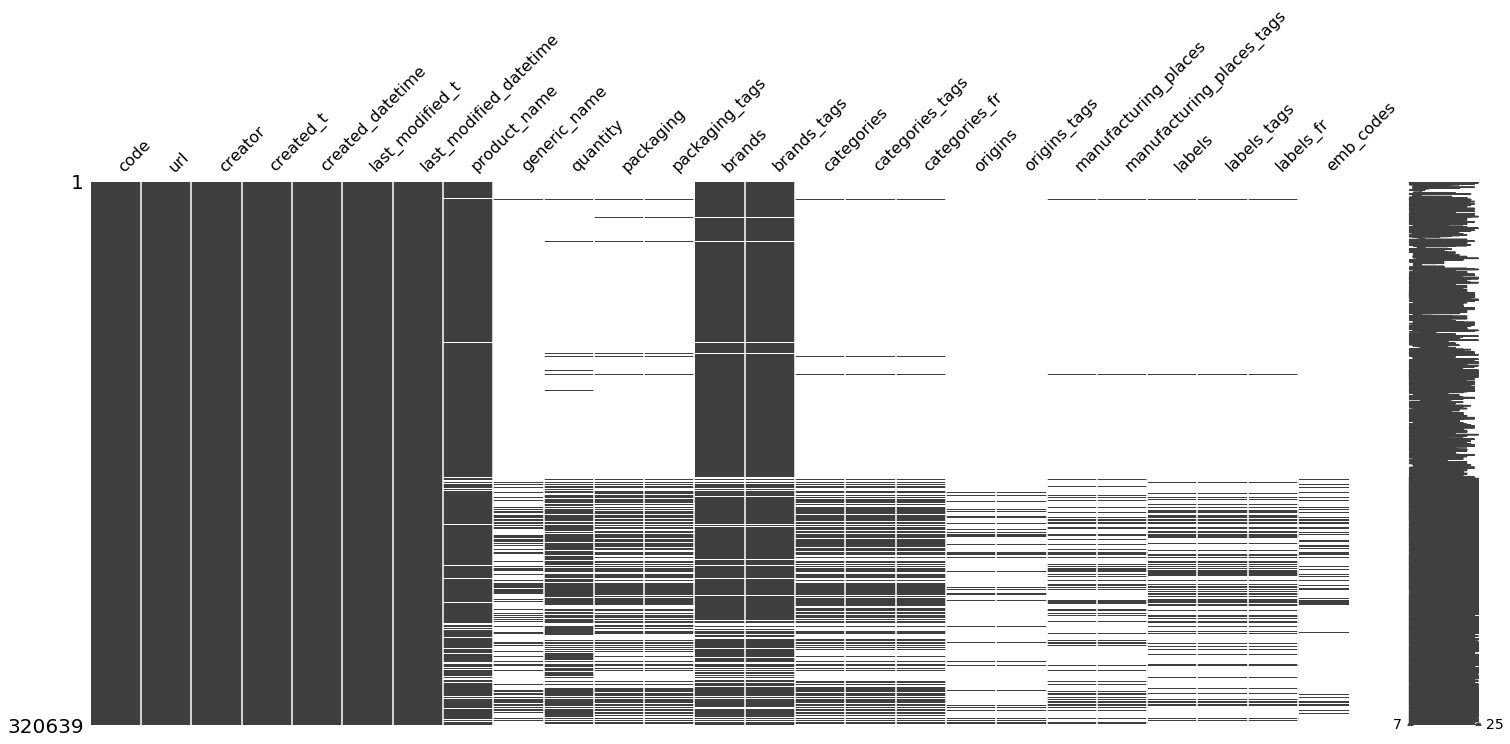

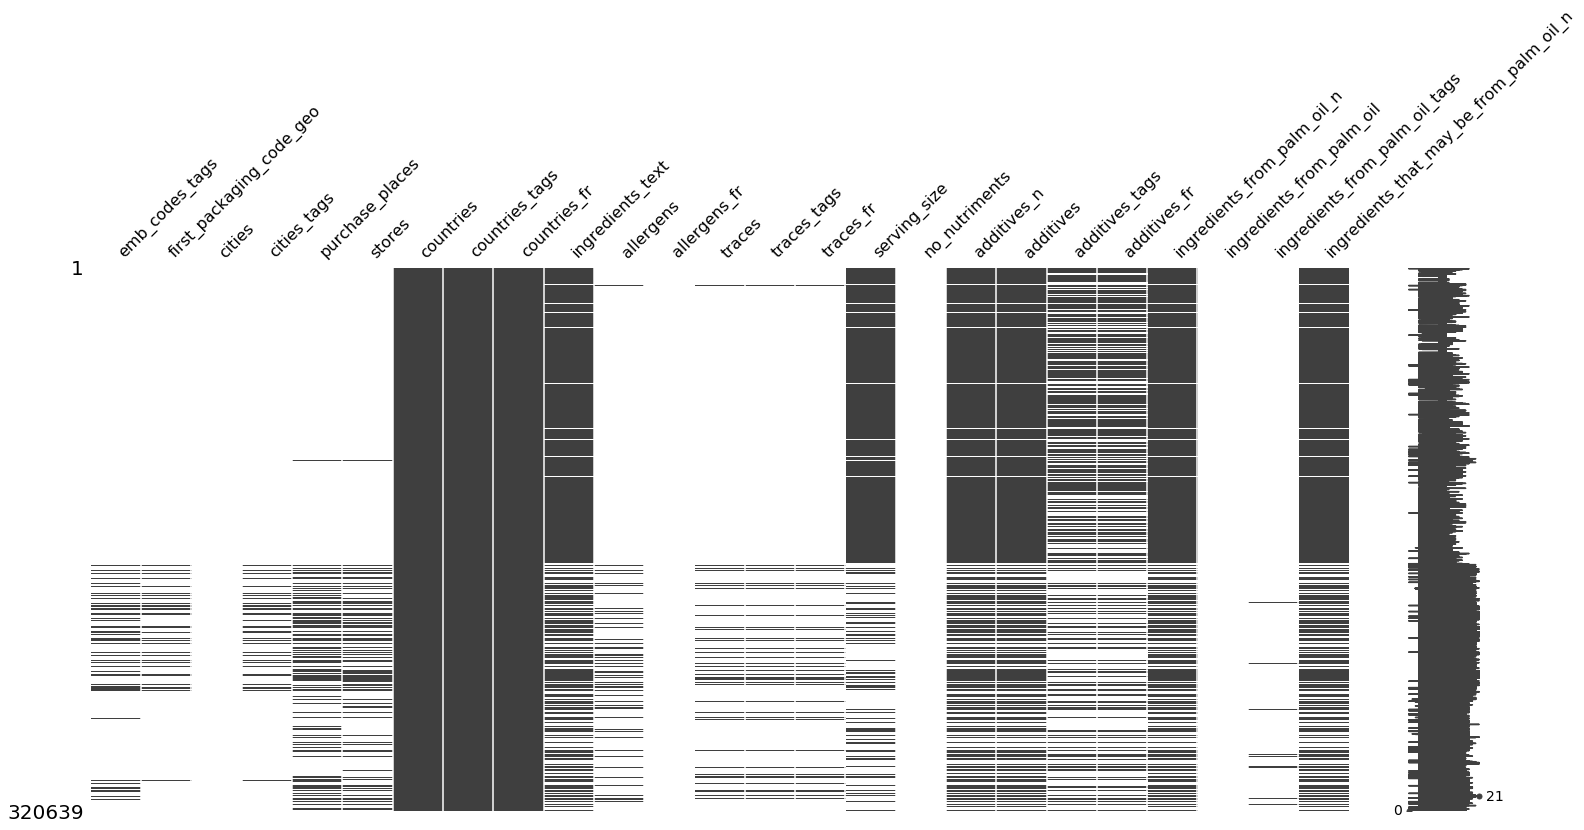

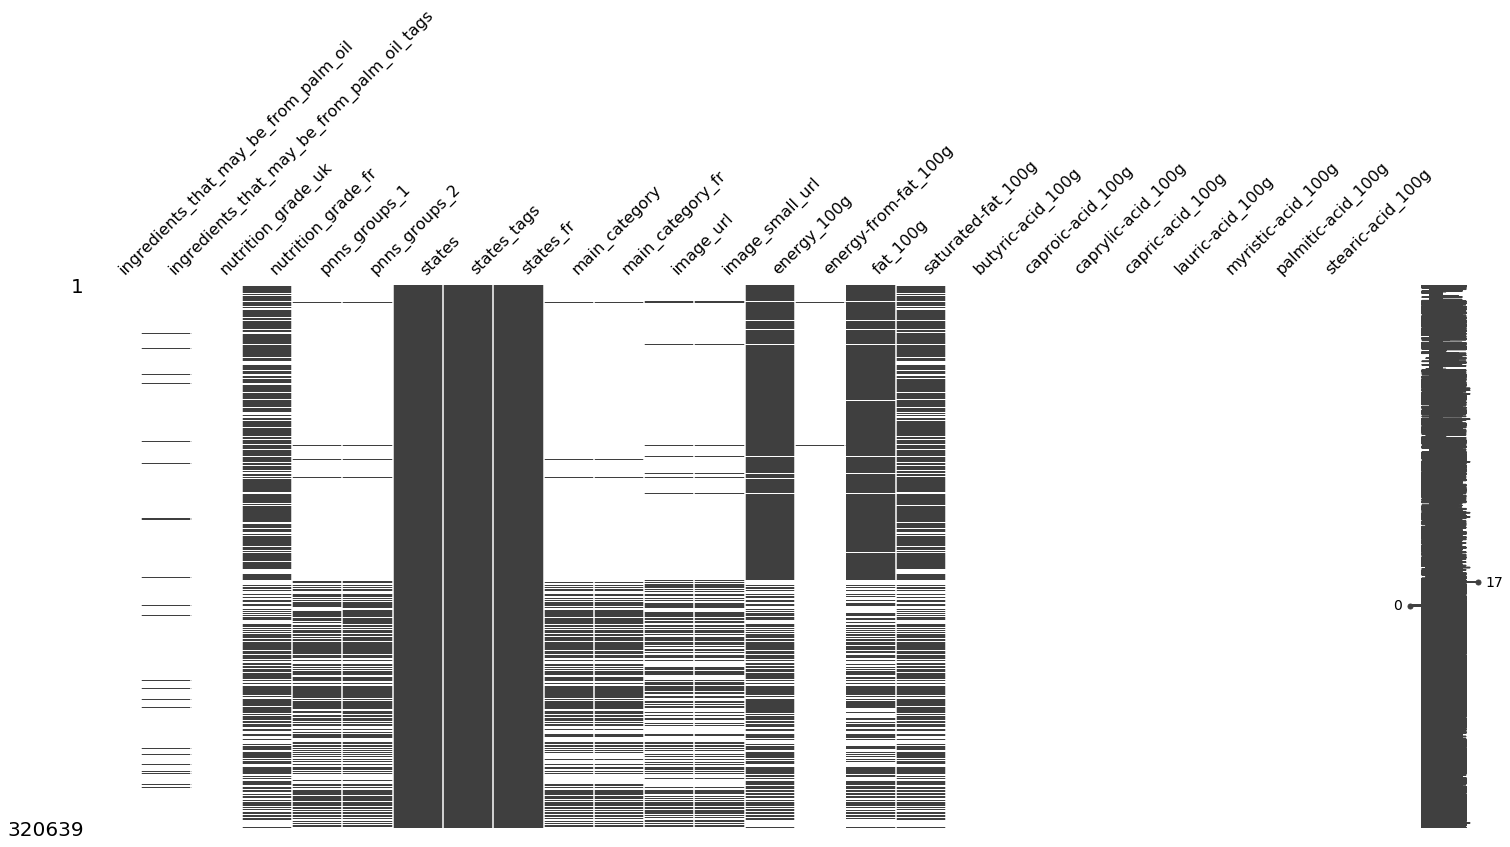

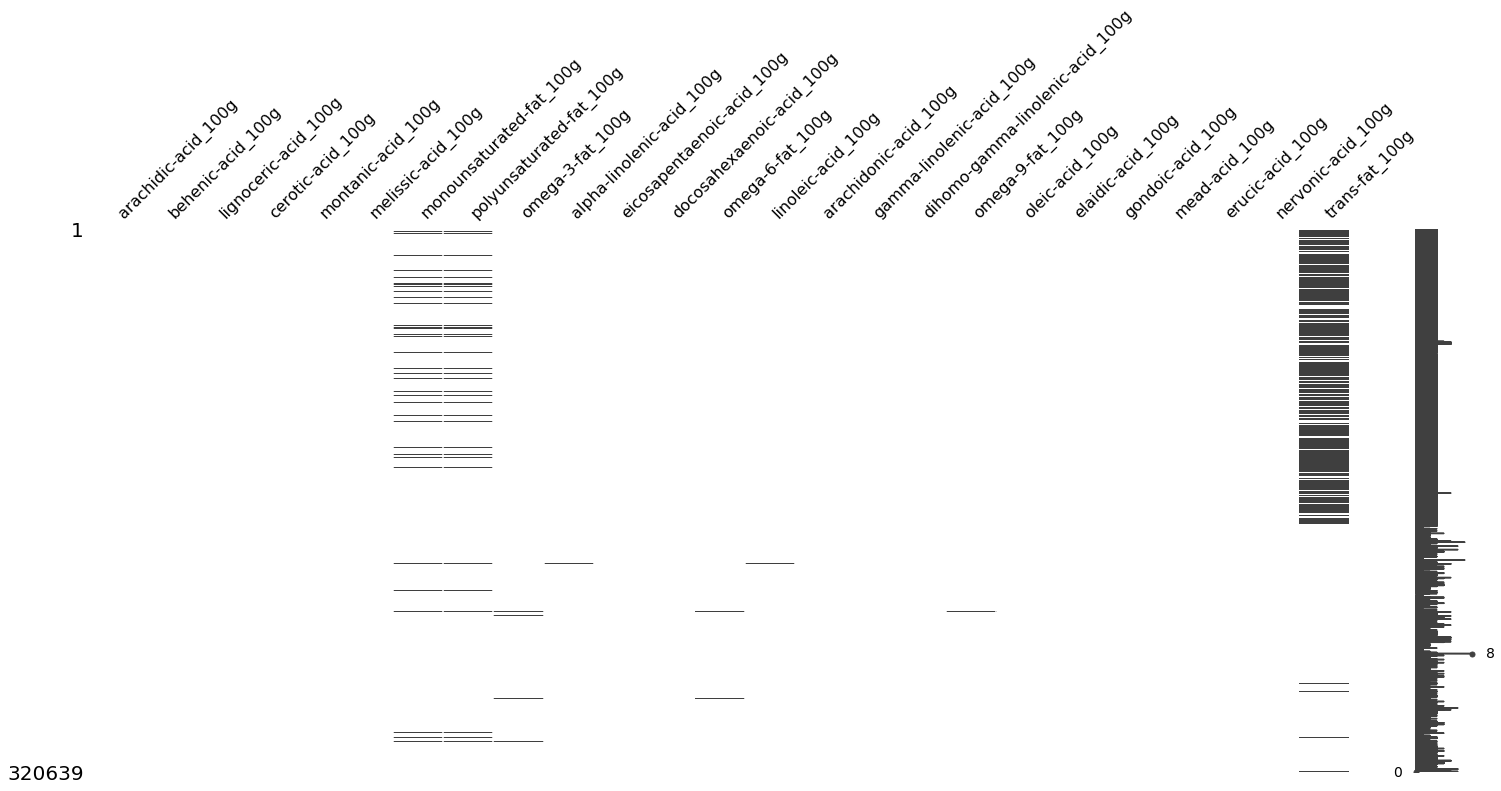

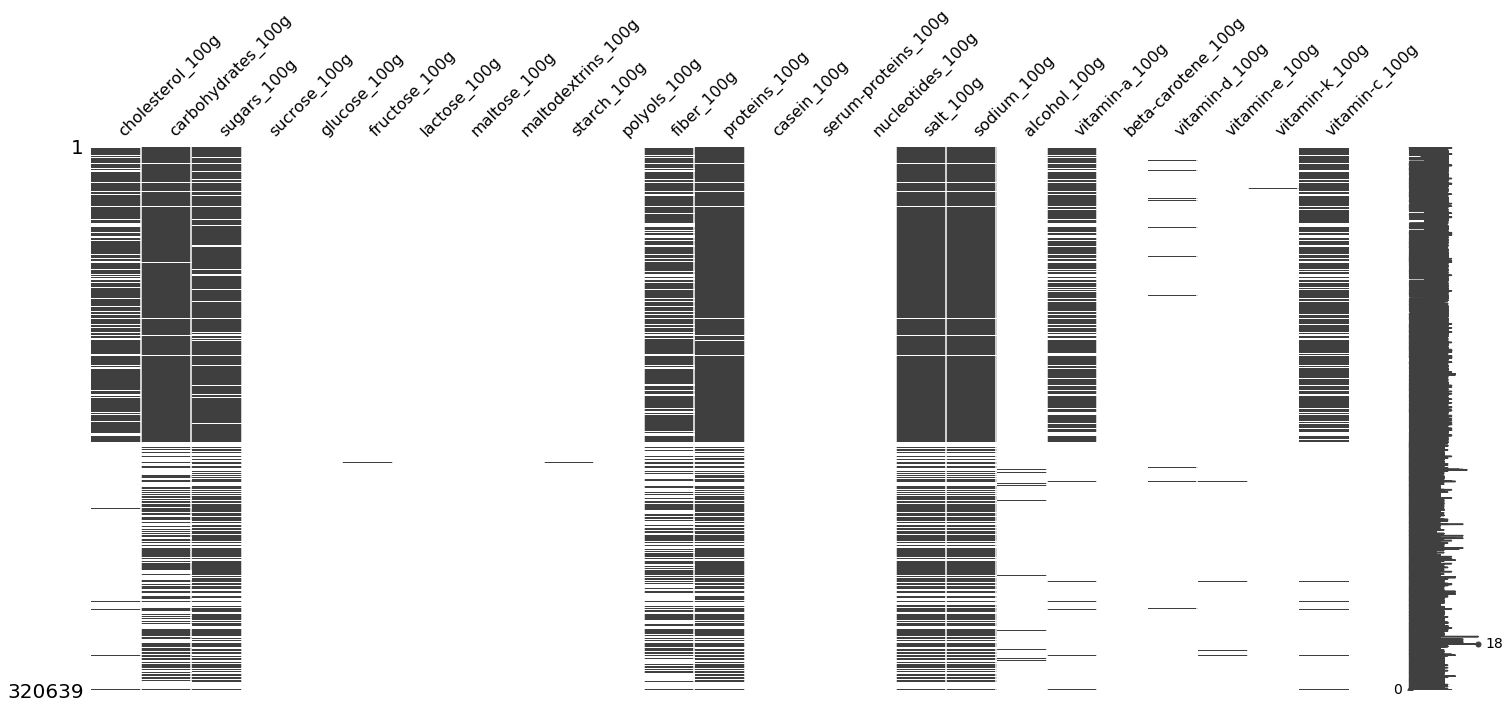

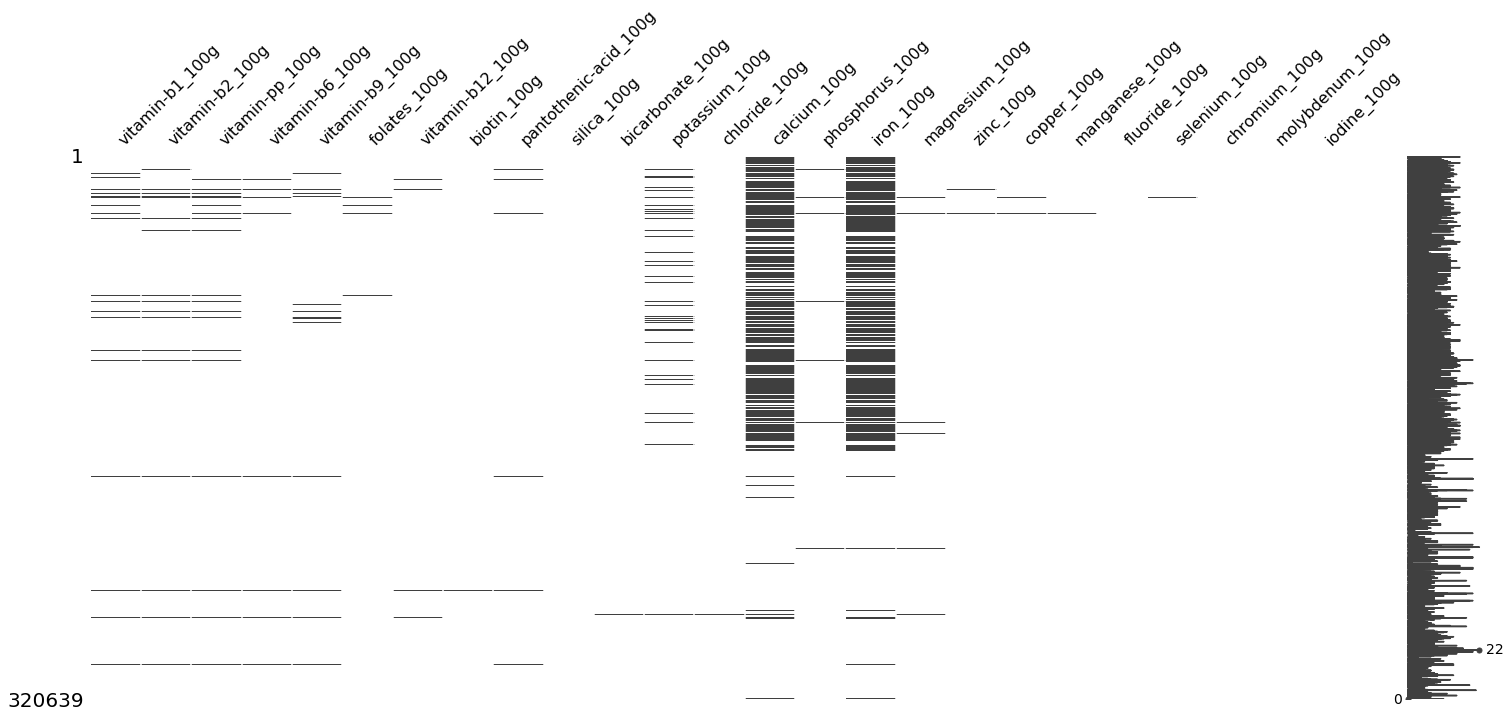

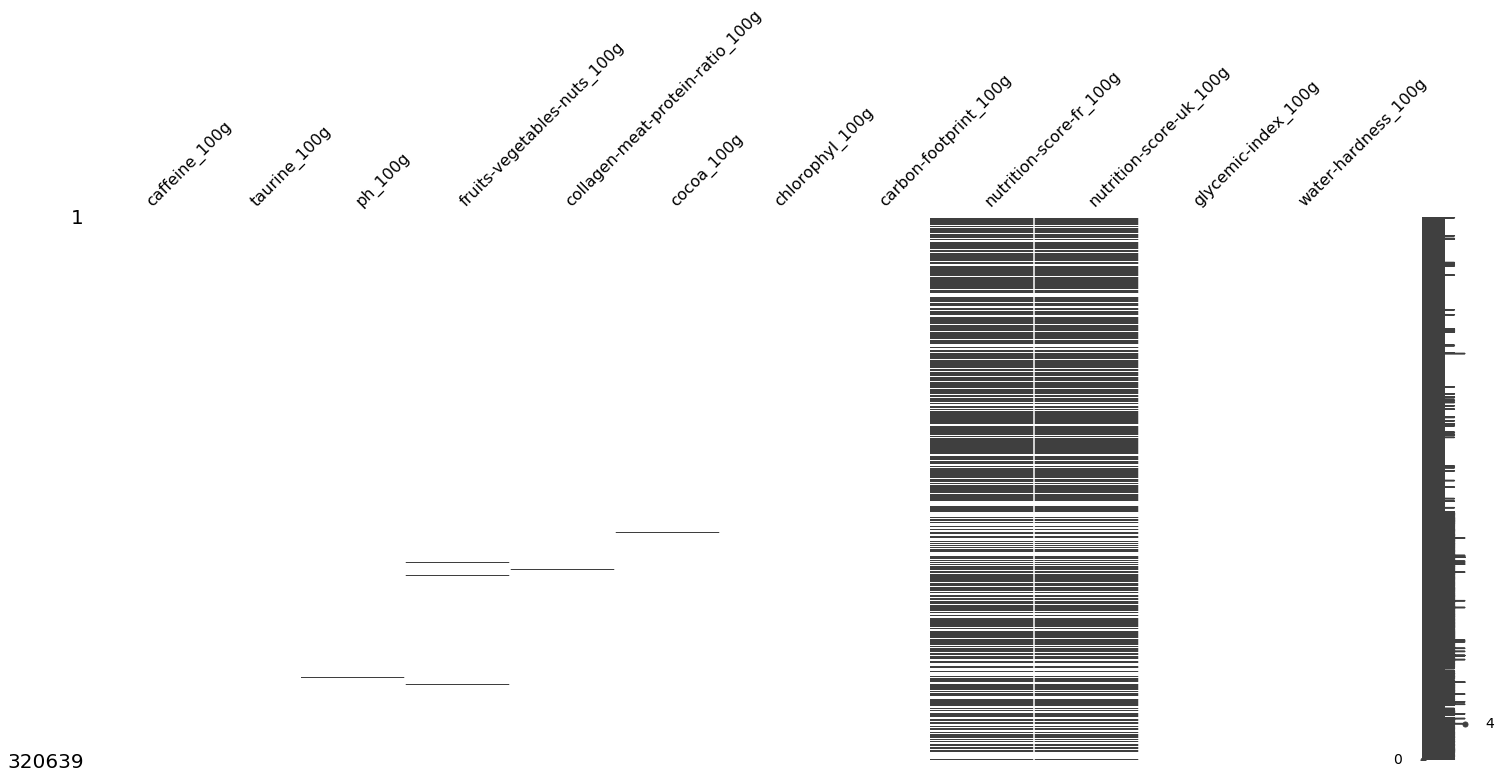

In [105]:
pas = 25
for i in range(1+int(dfOriginel.shape[1]/pas)):
    min_index = pas*i
    max_index = min(pas*(i+1), dfOriginel.shape[1])
    dfOriginel_part = dfOriginel.iloc[:,min_index:max_index]
    msno.matrix(dfOriginel_part)

In [111]:
dfOriginel_quant_index = list(dfOriginel.dtypes[dfOriginel.dtypes == 'float64'].index)
dfOriginel_quant_index = ['pnns_groups_1', 'pnns_groups_2'] + dfOriginel_quant_index
dfOriginel_quant = dfOriginel[dfOriginel_quant_index]
dfOriginel_quant

,pnns_groups_1,pnns_groups_2,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,1552.0,NaN,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

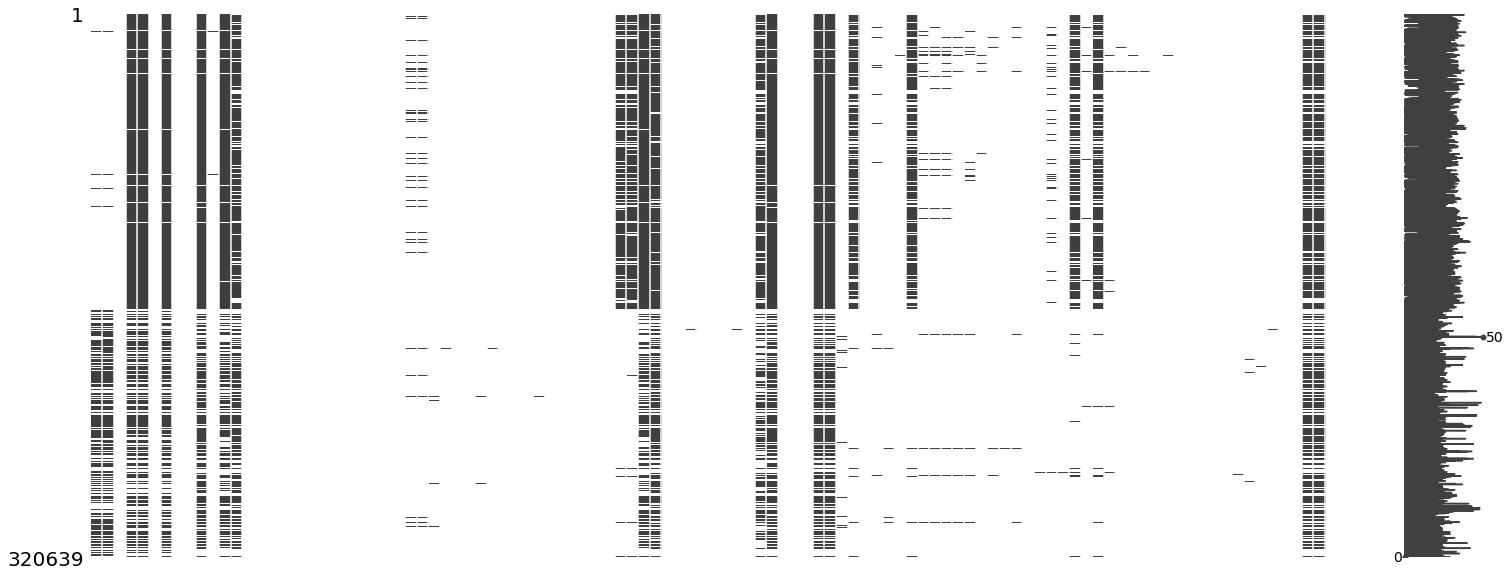

In [112]:
msno.matrix(dfOriginel_quant)

Qu'en est-il de la variable cible si nous choisissons par exemple le nutriscore ? 

In [10]:
def drawBoxPlot(_df, _feat):
    ax = sns.boxplot(data=_df[_feat], orient="v")

Variable cible : nutrition-score-fr_100g ou nutrition-score-uk_100g ?

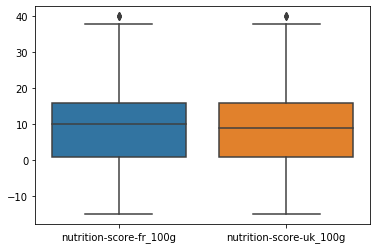

In [11]:
drawBoxPlot(dfOriginel, ['nutrition-score-fr_100g', 'nutrition-score-uk_100g'])

In [12]:
df_diffnutri = dfOriginel['nutrition-score-fr_100g'] - dfOriginel['nutrition-score-uk_100g']
df_diffnutri = df_diffnutri.fillna(0)
df_diffnutri[df_diffnutri != 0]
print(100*len(df_diffnutri[df_diffnutri != 0])/dfOriginel.shape[0])

2.5954422263043484


Il y a quand même plus de 2.5% des scores qui varient, on doit donc en choisir un, on prendra le score Français.

In [13]:
sparse_rate['nutrition-score-fr_100g']

31.03303091638884

Il y a donc environ 30% de NaN pour la variable cible.<br>
Ce score se calcule à partir des autres variables, on peut donc essayer de le calculer pour les NaN.<br>
Mais il faut le faire avant toute éventuelles suppression des autres features.<br>

In [14]:
tab_energy_solide = [335, 670, 1005, 1340, 1675, 2010, 2345, 2680, 3015, 3350]
tab_sugar_liquide = [4.5, 9, 13.5, 18, 22.5, 27, 31, 36, 40, 45]
tab_energy_liquide = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270]
tab_sugar_solide = [0, 1.5, 3, 4.5, 6, 7.5, 9, 10.5, 12, 13.5]
tab_saturated_fat_non_mat_grasses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
tab_saturated_fat_matieres_grasses = [9.999999, 15.999999, 21.999999, 27.999999, 33.999999, 39.999999, 45.999999, 51.999999, 57.999999, 63.999999]
tab_sodium = [0.090, 0.180, 0.270, 0.360, 0.450, 0.540, 0.630, 0.720, 0.810, 0.900]
tab_fruits_vegetables_rate = [40, 60, 80, 80.0001, 80.0002, 100, 101, 102, 103, 104]
tab_fiber = [0.7, 1.4, 2.1, 2.8, 3.5, 100, 101, 102, 103, 104]
tab_protein = [1.6, 3.2, 4.8, 6.4, 8.0, 100, 101, 102, 103, 104]

def get_one_feature_score(_feat, _tab):
    if row[_feat] <= _tab[0]:
        return 0
    elif ((row[_feat] > _tab[0]) & (row[_feat] <= _tab[1])):
        return 1
    elif ((row[_feat] > _tab[1]) & (row[_feat] <= _tab[2])):
        return 2        
    elif ((row[_feat] > _tab[2]) & (row[_feat] <= _tab[3])):
        return 3        
    elif ((row[_feat] > _tab[3]) & (row[_feat] <= _tab[4])):
        return 4        
    elif ((row[_feat] > _tab[4]) & (row[_feat] <= _tab[5])):
        return 5        
    elif ((row[_feat] > _tab[5]) & (row[_feat] <= _tab[6])):
        return 6        
    elif ((row[_feat] > _tab[6]) & (row[_feat] <= _tab[7])):
        return 7        
    elif ((row[_feat] > _tab[7]) & (row[_feat] <= _tab[8])):
        return 8        
    elif ((row[_feat] > _tab[8]) & (row[_feat] <= _tab[9])):
        return 9        
    elif (row[_feat] > _tab[9]):
        return 10     
    
def calc_globalscore(row):
    #Energy
    a = get_one_feature_score("energy_100g", tab_energy)
    #Sugar
    b = get_one_feature_score("sugars_100g", tab_sugar)
    #saturated-fat      
    c = get_one_feature_score("saturated-fat_100g", tab_saturated_fat)
    #sodium
    d = get_one_feature_score("sodium_100g", tab_sodium)
    #fruits-vegetables-rate
    e = - get_one_feature_score("fruits-vegetables-rate_100g", tab_fruits_vegetables_rate)
    #fiber
    f = - get_one_feature_score("fiber_100g", tab_fiber)
    #proteins
    g = - get_one_feature_score("proteins_100g", tab_protein)

    
    #Global_score
    global_score = a+b+c+d+e+f+g
    
    return global_score


In [15]:
df_score = dfOriginel[(np.isnan(dfOriginel["nutrition-score-fr_100g"])) & (~np.isnan(dfOriginel["energy_100g"])) & (~np.isnan(dfOriginel["sugars_100g"])) & (~np.isnan(dfOriginel["saturated-fat_100g"])) & (~np.isnan(dfOriginel["sodium_100g"])) & (~np.isnan(dfOriginel["fruits-vegetables-nuts_100g"])) & (~np.isnan(dfOriginel["fiber_100g"])) & (~np.isnan(dfOriginel["proteins_100g"]))]
df_score[["energy_100g", "sugars_100g", "saturated-fat_100g", "sodium_100g", "fruits-vegetables-nuts_100g", "fiber_100g", "proteins_100g", "nutrition-score-fr_100g"]]

,energy_100g,sugars_100g,saturated-fat_100g,sodium_100g,fruits-vegetables-nuts_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
187170,1506.0,18.0,6.00,2.400000,78.0,12.0,12.0,NaN
187190,88.0,1.2,0.10,0.283465,22.0,0.5,0.6,NaN
189762,273.0,1.7,1.40,0.374016,11.0,0.5,1.1,NaN
189763,124.0,1.3,0.05,0.362205,14.4,0.5,0.9,NaN
215343,1469.0,0.8,0.40,0.059055,0.0,4.6,8.0,NaN
234153,1309.0,28.0,0.30,2.952756,49.0,15.0,7.0,NaN
314633,200.0,2.1,1.30,0.287402,41.0,0.6,1.0,NaN
315939,159.0,1.5,0.60,0.314961,8.3,0.5,1.0,NaN


Il n'y a qu 8 enregistrements susceptibles d'obtenir un score calculé, c'est trop peu pour en valoir la peine. 

In [16]:
#https://www.kaggle.com/carolinemnard/classification-sur-le-nutriscore
#https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/
#https://curvenote.com/@test/nutriscore/open-food-facts-classification
#https://www.kaggle.com/michaelfumery/openfoodfacts-data-cleaning
#http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/prepare_data_2017.html
#https://github.com/k3nz0/nutriscore-prediction

## 1.4 Suppression des colonnes et des lignes trop NaNées

On ne garde que les features dont on a un bon pourcentage de valeurs renseignées, par exemple au-delà de 75%:

<u>Suppresion des enregistrements ayant plus d'un pourcenage seuil de NaN pour les colonnes et les lignes</u>: 

In [90]:
def getDenseData(_df, _col_rate, _row_rate):
    # NaN sur les features
    sparse_rate = 100*_df.isna().mean()
    df_feature_inf_col_rate_nan = _df[sparse_rate[sparse_rate <= _col_rate].index]
    print(df_feature_inf_col_rate_nan.shape)
    # NaN surles enregistrements mais unquement pour les features numériques, principament celles sur lesquelles portent le métier
    # on extrait d'abord les features numériques
    df_feature_inf_col_rate_nan_quant = df_feature_inf_col_rate_nan[df_feature_inf_col_rate_nan.dtypes[df_feature_inf_col_rate_nan.dtypes == 'float64'].index]
    # on ajoute la variable des % de NaN sur ces features
    df_feature_inf_col_rate_nan_quant['pcnan'] = 100*df_feature_inf_col_rate_nan_quant.isna().mean(axis = 0)
    # on ne retient que les enregistrements qui ont un % en dessous du seuil choisi 
    df_feature_inf_col_rate_nan_quant = df_feature_inf_col_rate_nan_quant.loc[df_feature_inf_col_rate_nan_quant['pcnan'] <= _row_rate]
    return df_feature_inf_col_rate_nan.loc[df_feature_inf_col_rate_nan_quant.index]

print(dfOriginel.shape)
dfDense = getDenseData(dfOriginel, _col_rate = 75, _row_rate = 50)
print(dfDense.shape)

(320639, 162)
(320639, 50)
(0, 50)


# 1re FACON

In [53]:
sparse_rate = 100*dfOriginel.isna().mean()
df_feature_inf_col_rate_nan = dfOriginel[sparse_rate[sparse_rate <= 75].index]
print(df_feature_inf_col_rate_nan.shape)

(320639, 50)


In [54]:
df_feature_inf_col_rate_nan_quant = df_feature_inf_col_rate_nan[df_feature_inf_col_rate_nan.dtypes[df_feature_inf_col_rate_nan.dtypes == 'float64'].index]
df_feature_inf_col_rate_nan_quant

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0.0,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0.0,0.0,0.0,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,0.0,0.0,0.0,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_feature_inf_col_rate_nan_quant['pcnan'] = 100*df_feature_inf_col_rate_nan_quant.isna().mean(axis = 1)
df_feature_inf_col_rate_nan_quant

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,pcnan
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
1,0.0,0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0,0.0
2,0.0,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0,0.0
3,0.0,0.0,0.0,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0,20.0
4,0.0,0.0,0.0,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
320768,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


In [46]:
df_feature_inf_col_rate_nan_quant2 = df_feature_inf_col_rate_nan_quant[df_feature_inf_col_rate_nan_quant['pcnan'] <= 50]
df_feature_inf_col_rate_nan_quant2

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,pcnan
1,0.0,0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000000,0.0,0.0214,0.000,0.00129,14.0,14.0,4.761905
2,0.0,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0,0.0000,0.071,0.00129,0.0,0.0,4.761905
3,0.0,0.0,0.0,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482000,NaN,NaN,0.143,0.00514,12.0,12.0,23.809524
5,0.0,0.0,0.0,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN,42.857143
7,2.0,0.0,0.0,1833.0,18.75,4.69,NaN,NaN,57.81,15.62,9.4,14.06,0.13970,0.055000,NaN,NaN,0.062,0.00422,7.0,7.0,23.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,0.0,0.0,0.0,1477.0,0.00,0.00,0.0,0.000,87.06,2.35,4.7,1.18,0.03048,0.012000,0.0,0.0000,0.000,0.00127,-1.0,-1.0,4.761905
320751,NaN,NaN,NaN,1643.0,2.80,0.60,NaN,NaN,74.80,2.60,5.9,13.00,0.68000,0.267717,NaN,NaN,NaN,0.00380,-4.0,-4.0,42.857143
320756,0.0,0.0,0.0,569.0,31.00,NaN,NaN,NaN,12.20,9.60,1.1,2.10,1.10000,0.433071,NaN,NaN,NaN,NaN,NaN,NaN,47.619048
320763,0.0,0.0,0.0,21.0,0.20,0.20,NaN,NaN,0.50,0.50,0.2,0.50,0.02540,0.010000,NaN,NaN,NaN,NaN,2.0,0.0,33.333333


In [56]:
df_feature_inf_col_rate_nan = df_feature_inf_col_rate_nan.loc[df_feature_inf_col_rate_nan_quant2.index]
df_feature_inf_col_rate_nan

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0,0.0000,0.071,0.00129,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482000,NaN,NaN,0.143,0.00514,12.0,12.0
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,Unfi,unfi,NaN,NaN,NaN,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN
7,16124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,Daddy's Muesli,daddy-s-muesli,NaN,NaN,NaN,US,en:united-states,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,"en:e123,en:e307a","E123 - Amarante,E307a - Tocophérol",0.0,0.0,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1833.0,18.75,4.69,NaN,NaN,57.81,15.62,9.4,14.06,0.13970,0.055000,NaN,NaN,0.062,0.00422,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [57]:
df_feature_inf_col_rate_nan.reset_index()

,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000000,0.0,0.0214,0.000,0.00129,14.0,14.0
1,2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0,0.0000,0.071,0.00129,0.0,0.0
2,3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482000,NaN,NaN,0.143,0.00514,12.0,12.0
3,5,16100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,Unfi,unfi,NaN,NaN,NaN,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN
4,7,16124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,Daddy's Muesli,daddy-s-muesli,NaN,NaN,NaN,US,en:united-states,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,"en:e123,en:e307a","E123 - Amarante,E307a - Tocophérol",0.0,0.0,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1833.0,18.75,4.69,NaN,NaN,57.81,15.62,9.4,14.06,0.13970,0.055000,NaN,NaN,0.062,0.00422,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

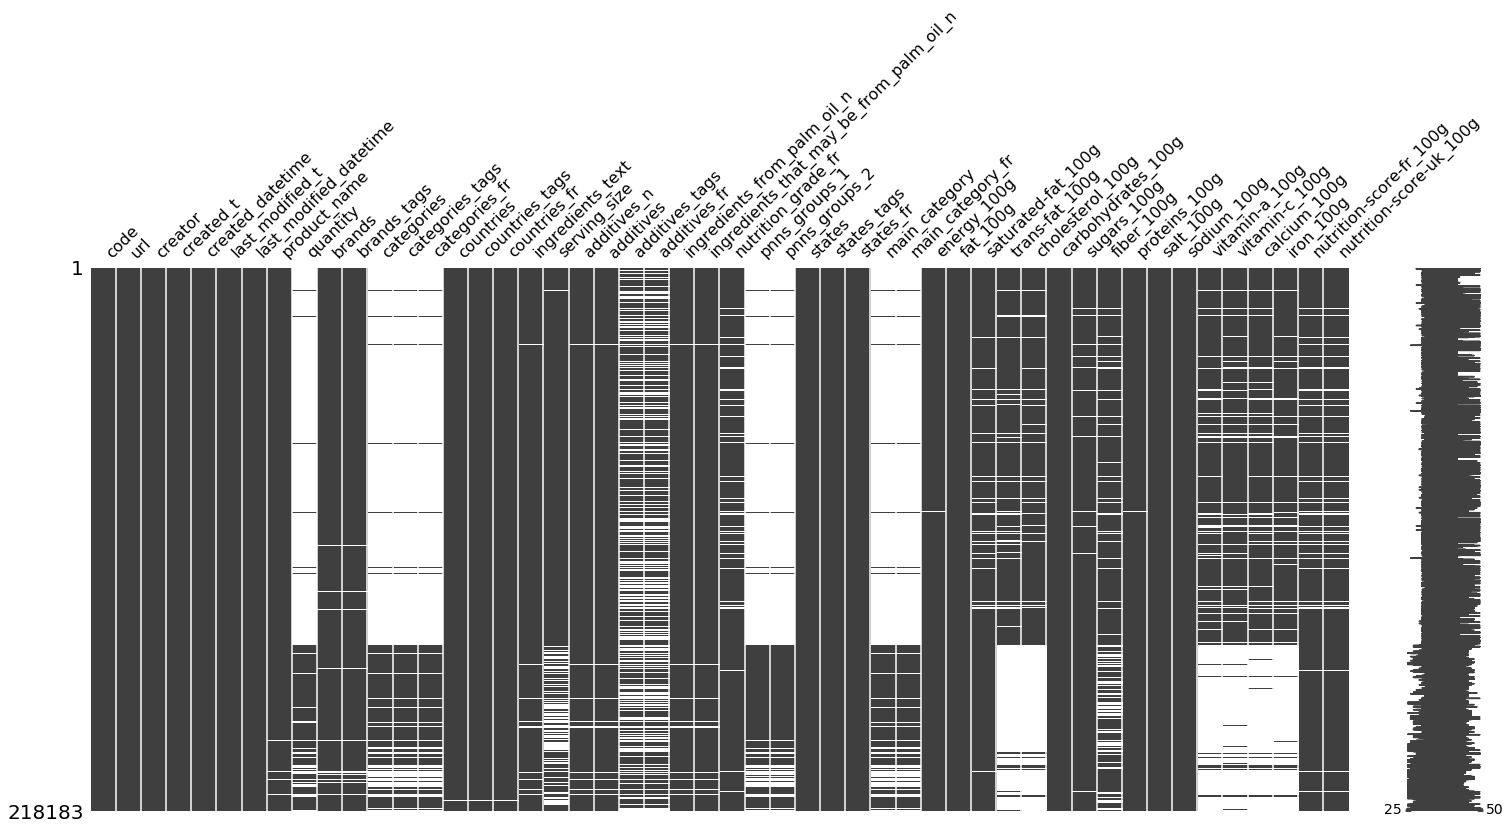

In [58]:
msno.matrix(df_feature_inf_col_rate_nan)

# 2eme FACON

In [63]:
sparse_rate = 100*dfOriginel.isna().mean()
df_feature_inf_col_rate_nan2 = dfOriginel[sparse_rate[sparse_rate <= 75].index]
print(df_feature_inf_col_rate_nan2.shape)

(320639, 50)


In [64]:
df_feature_inf_col_rate_nan2['pcnan'] = 100*df_feature_inf_col_rate_nan2.isna().mean(axis = 1)
df_feature_inf_col_rate_nan2

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,pcnan
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0,24.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0,20.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0,28.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,

In [66]:
df_feature_inf_col_rate_nan2 = df_feature_inf_col_rate_nan2[df_feature_inf_col_rate_nan2['pcnan'] <= 50]
df_feature_inf_col_rate_nan2

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,pcnan
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0,24.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0,20.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0,28.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,Unfi,unfi,NaN,NaN,NaN,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [67]:
df_feature_inf_col_rate_nan2 = df_feature_inf_col_rate_nan2.reset_index()
df_feature_inf_col_rate_nan2

,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,pcnan
0,1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0,24.0
1,2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0,20.0
2,3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0,28.0
3,4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0
4,5,16100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,Unfi,unfi,NaN,NaN,NaN,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

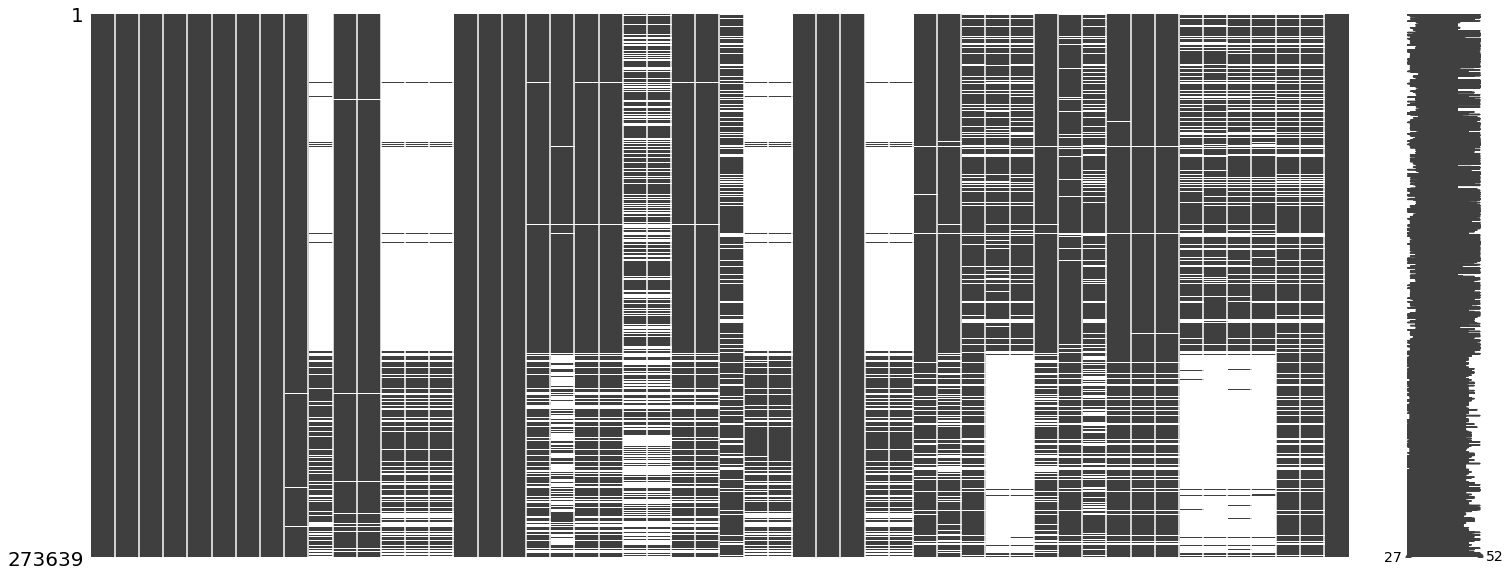

In [68]:
msno.matrix(df_feature_inf_col_rate_nan2)

# 3eme FACON

In [84]:
df_feature_inf_col_rate_nan3 = dfOriginel.copy()
df_feature_inf_col_rate_nan3['pcnan'] = 100*df_feature_inf_col_rate_nan3.isna().mean(axis = 1)
df_feature_inf_col_rate_nan3

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,pcnan
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.506173
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [

In [85]:
df_feature_inf_col_rate_nan3 = df_feature_inf_col_rate_nan3[df_feature_inf_col_rate_nan3['pcnan'] <= 75]
df_feature_inf_col_rate_nan3 = df_feature_inf_col_rate_nan3.reset_index()
df_feature_inf_col_rate_nan3.shape

(163374, 164)

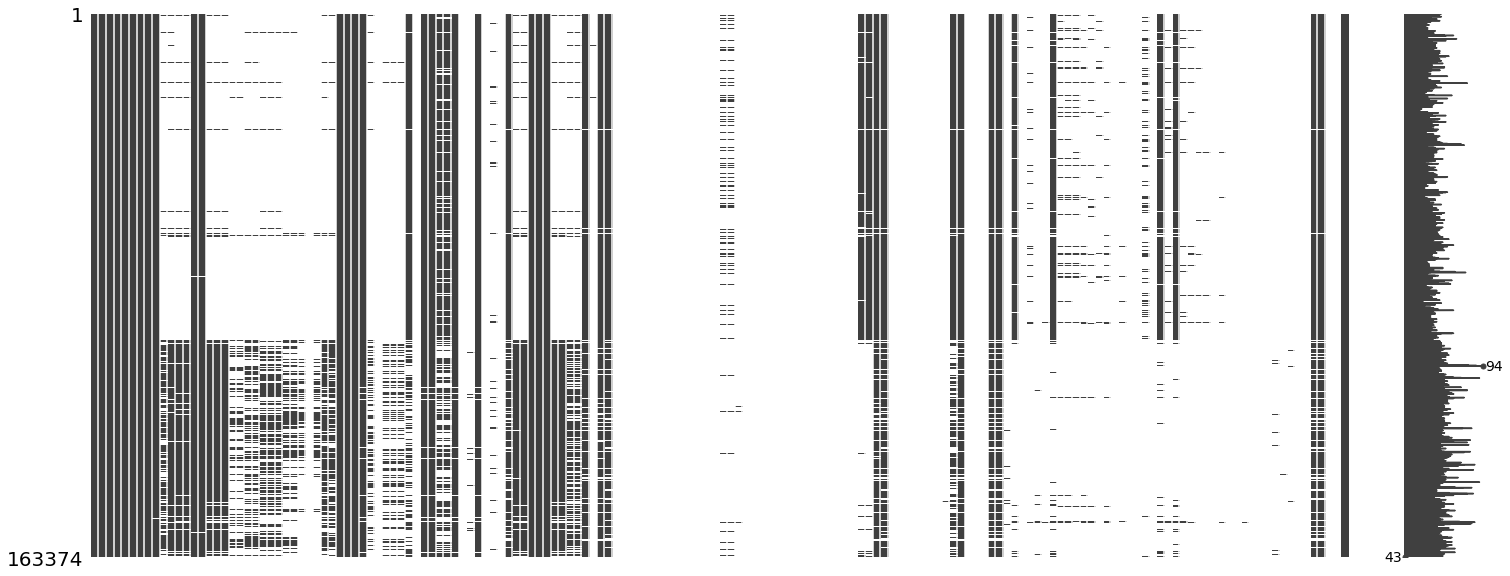

In [86]:
msno.matrix(df_feature_inf_col_rate_nan3)

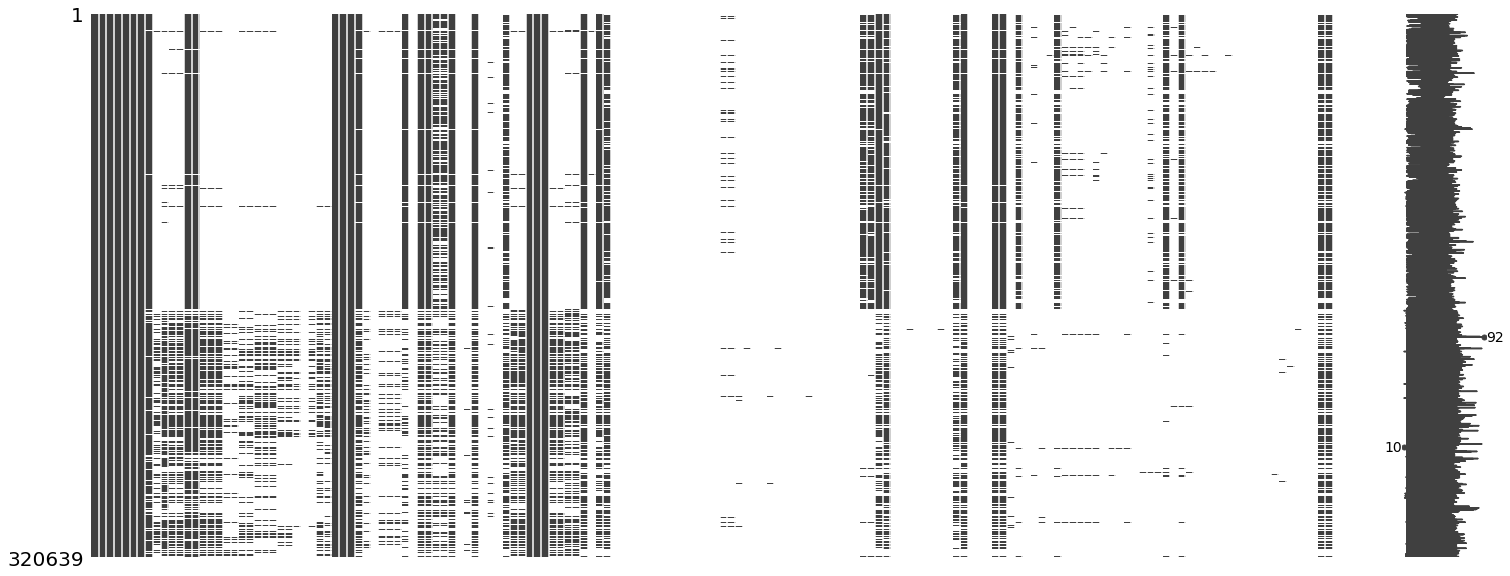

In [73]:
msno.matrix(dfOriginel)

# 2. Analyse univariée

## 2.1 Distinction des types de variable

Variables numériques:

In [18]:
dfDense_quant = dfDense[dfDense.dtypes[dfDense.dtypes == 'float64'].index]
dfDense_quant

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,0.0,0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0.0,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0.0,0.0,0.0,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482000,NaN,NaN,0.143,0.00514,12.0,12.0
5,0.0,0.0,0.0,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN
7,2.0,0.0,0.0,1833.0,18.75,4.69,NaN,NaN,57.81,15.62,9.4,14.06,0.13970,0.055000,NaN,NaN,0.062,0.00422,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320751,NaN,NaN,NaN,1643.0,2.80,0.60,NaN,NaN,74.80,2.60,5.9,13.00,0.68000,0.267717,NaN,NaN,NaN,0.00380,-4.0,-4.0
320756,0.0,0.0,0.0,569.0,31.00,NaN,NaN,NaN,12.20,9.60,1.1,2.10,1.10000,0.433071,NaN,NaN,NaN,NaN,NaN,NaN
320763,0.0,0.0,0.0,21.0,0.20,0.20,NaN,NaN,0.50,0.50,0.2,0.50,0.02540,0.010000,NaN,NaN,NaN,NaN,2.0,0.0
320768,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000000,0.0,0.0000,0.000,0.00000,0.0,0.0


Variables qualitatives:

In [19]:
dfDense_qual = dfDense[dfDense.dtypes[dfDense.dtypes == 'object'].index]
dfDense_qual.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives,additives_tags,additives_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN


## 2.2 Analyse univariée des variables quantitatives

Liste des variables quantitatives retenues:

In [20]:
dfDense_quant.columns

Index(['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'], dtype='object')

Avant d'étudier de faire l'analyse, on peut déjà supprimer certaines valeurs aberrantes "techniques". Puisque les échatillons font 100g, on peut supprimer passer en NaN toutes les valeurs supérieures à 100. 

In [21]:
dfDense_quant.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,226129.000000,226129.000000,226129.000000,2.344360e+05,233707.000000,212109.000000,143155.000000,143951.000000,233740.000000,226891.000000,183617.000000,233995.000000,234011.000000,233991.000000,137435.000000,140603.000000,140614.000000,140270.000000,204571.000000,204571.000000
mean,2.014235,0.019794,0.054106,1.157726e+03,12.900314,5.073353,0.073363,0.020072,32.496248,16.050085,2.917900,7.104231,1.775485,0.699069,0.000360,0.021270,0.123812,0.003649,9.171412,9.075387
std,2.524219,0.140996,0.265177,6.795477e+03,17.567651,7.847416,1.540290,0.358227,29.054140,22.412318,13.340932,8.284843,133.885709,52.713161,0.072059,2.212686,3.307271,0.214553,9.062830,9.190460
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.930000e+02,0.000000,0.000000,0.000000,0.000000,6.450000,1.380000,0.000000,0.710000,0.066040,0.026000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.121000e+03,5.360000,1.790000,0.000000,0.000000,21.430000,5.830000,1.600000,4.800000,0.589280,0.232000,0.000000,0.000000,0.035000,0.001010,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,20.590000,7.140000,0.000000,0.020000,58.970000,24.140000,3.600000,10.000000,1.361440,0.536000,0.000107,0.003600,0.106000,0.002400,16.000000,16.000000
max,31.000000,2.000000,6.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,209.380000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


- L'élément le plus calorique au monde est la catégorie des huiles avec 900 calories pour 100 grammes, largement devant le sucre. <br>
- Ce qui fait un maximum d'un peu moins de 4000 KJ pour 100g. On peut donc assurément borner la variable energy_100g à 4000.<br>
- D'après la description du dataset, "- fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product", pour les variables mesurées en grammes, on peut donc les limiter à 100. <br>
- Je choisis, pour les valeurs supérieures à ces bornes, de ne pas mettre la valeur maximale car il est probable que ces valeurs sont fausses et n'ont donc pas de sens. Je les passe donc en NaN.

In [22]:
def bornification(_df):
    _df['energy_100g'] = _df['energy_100g'].map(lambda x: x if x < 4000 else np.NaN)
    ingredients_to_remove = ['energy_100g', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']
    ingredients = [i for i in list(dfDense_quant.columns) if i not in ingredients_to_remove]
    for i in ingredients:
        _df[i] = _df[i].map(lambda x: x if x <= 100 else np.NaN)
    return _df

dfDense = bornification(dfDense)


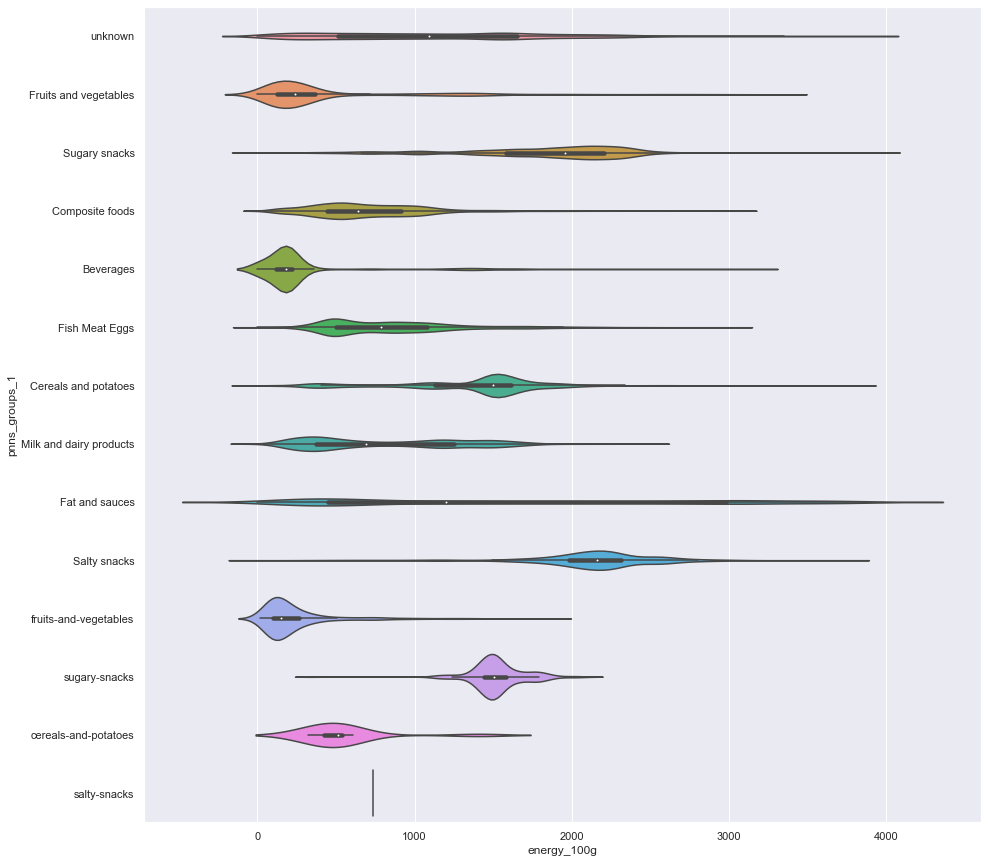

In [23]:
sns.set(rc={'figure.figsize':(15,15)})
sns.violinplot(x=dfDense['energy_100g'], y=dfDense['pnns_groups_1'], data=dfDense)

In [24]:
dfDense2 = dfDense.copy()
dfDense2["vitamin-a_100g"].mean()

0.00035978492976322413

In [25]:
dfDense['vitamin-a_100g'] = dfDense['vitamin-a_100g'].map(lambda x: x if x <= 0.001 else np.NaN)
dfDense2['vitamin-a_100g'] = dfDense2['vitamin-a_100g'].map(lambda x: x if x <= 0.001 else np.NaN)

In [26]:
dfDense2['vitamin-a_100g'].fillna(value=dfDense2['vitamin-a_100g'].mean(), inplace=True)
dfDense2['vitamin-a_100g']

1         0.000000
2         0.000000
3         0.000079
5         0.000079
7         0.000079
            ...   
320751    0.000079
320756    0.000079
320763    0.000079
320768    0.000000
320771    0.000079
Name: vitamin-a_100g, Length: 234778, dtype: float64

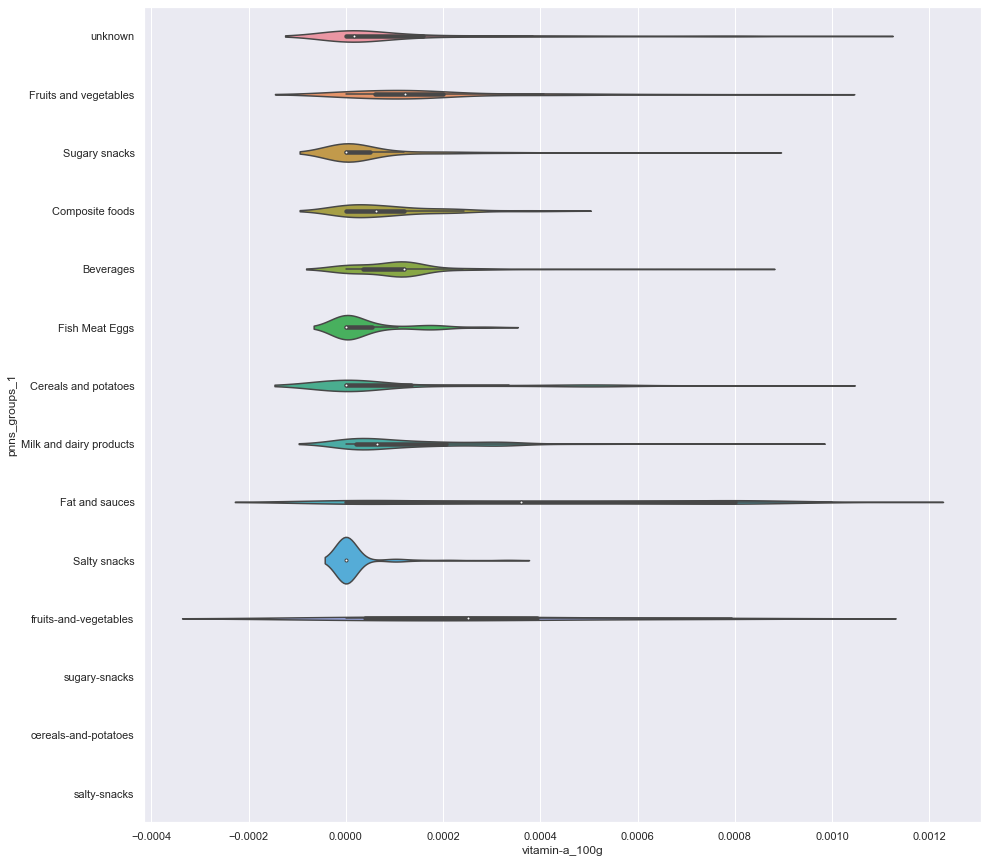

In [27]:
sns.set(rc={'figure.figsize':(15,15)})
sns.violinplot(x=dfDense['vitamin-a_100g'], y=dfDense['pnns_groups_1'], data=dfDense)

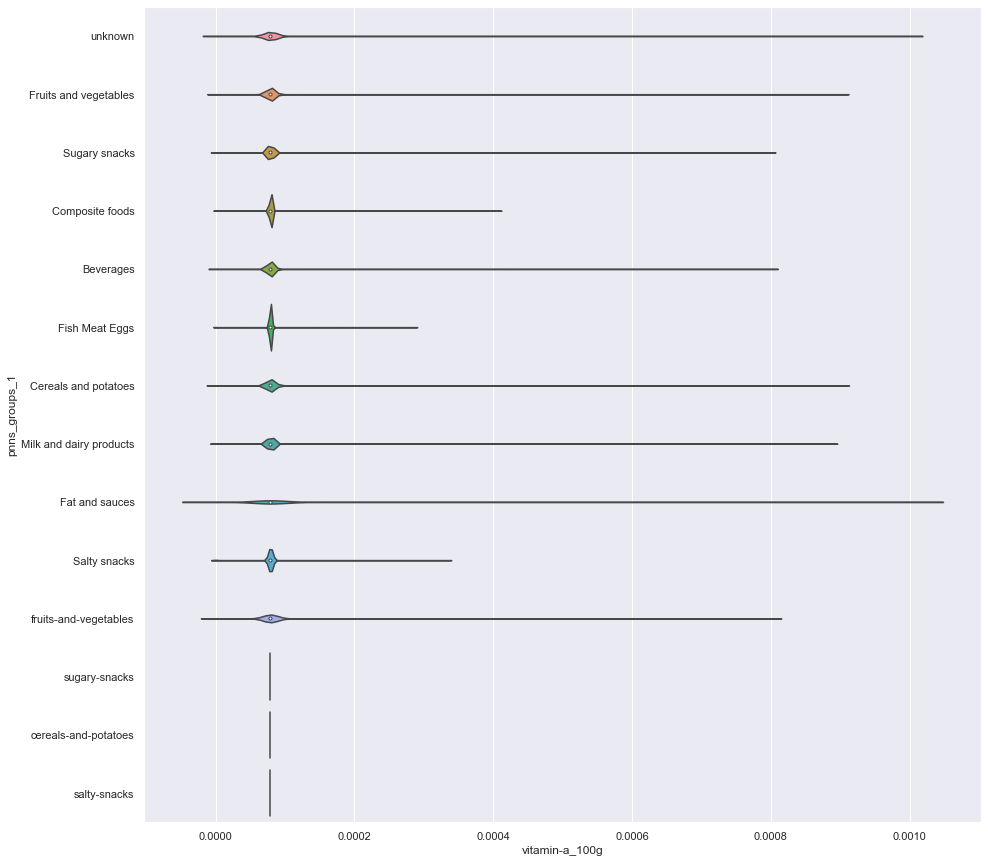

In [28]:
sns.set(rc={'figure.figsize':(15,15)})
sns.violinplot(x=dfDense2['vitamin-a_100g'], y=dfDense2['pnns_groups_1'], data=dfDense2)

Le fait de remplacer par la moyenne, il y a tellement de NaN que cela change complètement la distribution en la regroupant surtout au niveau de la moyenne !

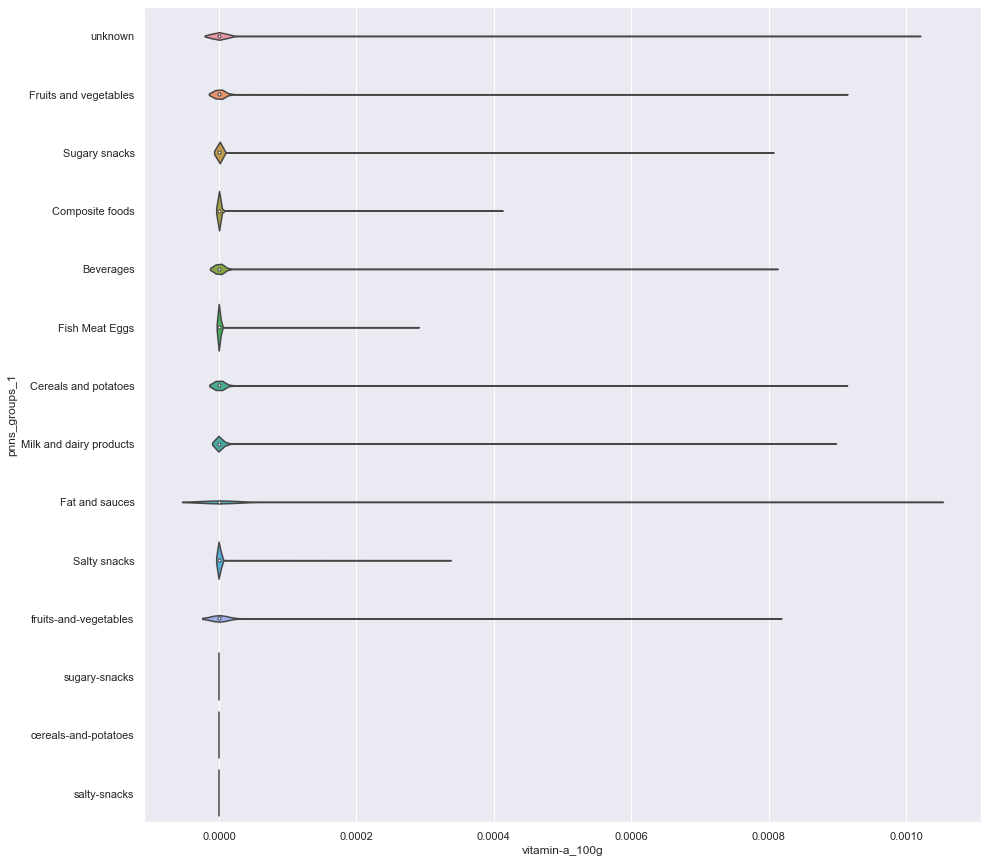

In [29]:
dfDense2 = dfDense.copy()
dfDense2['vitamin-a_100g'].fillna(value=dfDense2['vitamin-a_100g'].median(), inplace=True)
sns.violinplot(x=dfDense2['vitamin-a_100g'], y=dfDense2['pnns_groups_1'], data=dfDense2)

Même problème avec la médian (même si j'avais déjà enlevé les outliers. 

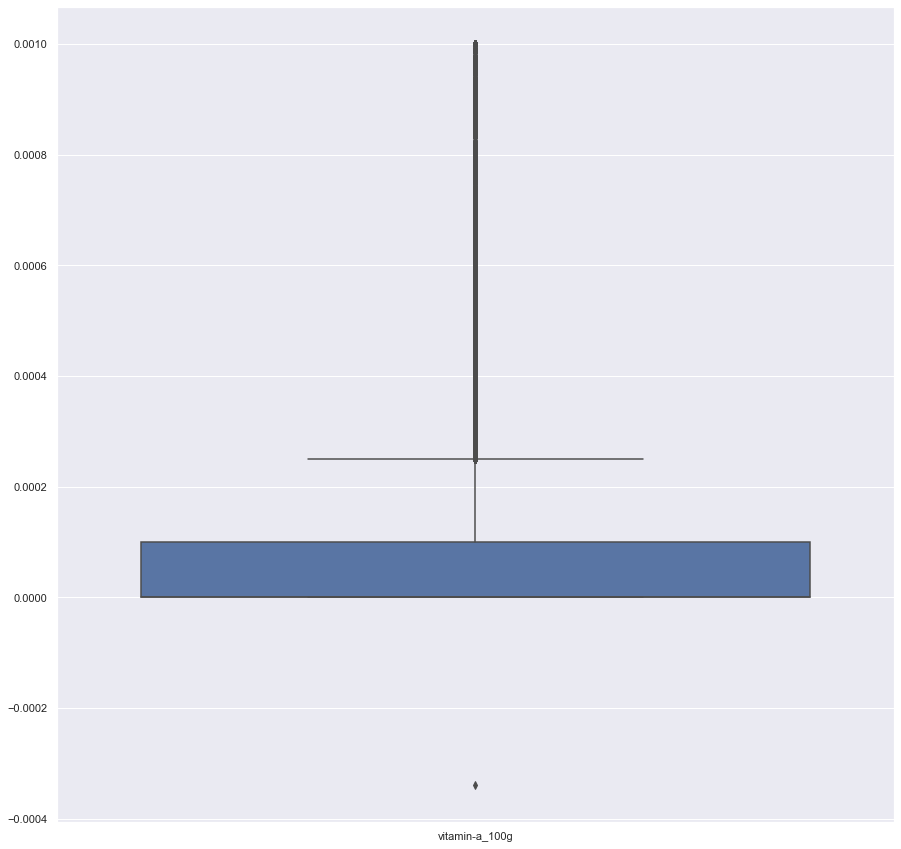

In [30]:
drawBoxPlot(dfDense, ["vitamin-a_100g"])

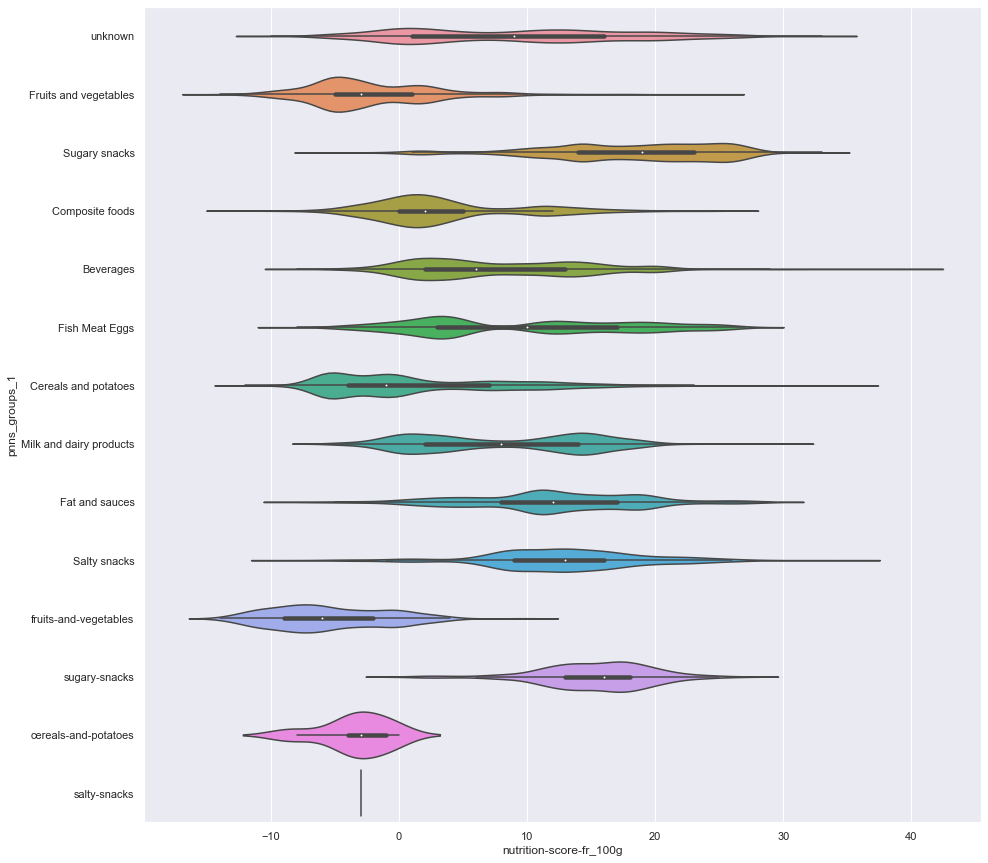

In [31]:
sns.violinplot(x=dfDense['nutrition-score-fr_100g'], y=dfDense['pnns_groups_1'], data=dfDense)

Gestion des unknown dans les catégories de pnns_groups_1 et pnns_groups_2: <br>
Puisque pnns_groups_2 représente des sous-catégories de pnns_groups_1, peut-on les déduire de pnns_groups_1 ?

In [32]:
dfDense[dfDense["pnns_groups_1"] == 'unknown']["pnns_groups_2"].unique()

array(['unknown'], dtype=object)

In [33]:
set1 = set(dfDense[dfDense["pnns_groups_1"] == 'unknown'].index)
set2 = set(dfDense[dfDense["pnns_groups_2"] == 'unknown'].index)
print(len(set1), len(set1 & set2))

10830 10830


Le pnns_groups_2 ne permet pas de déterminer le pnns_groups_1 !

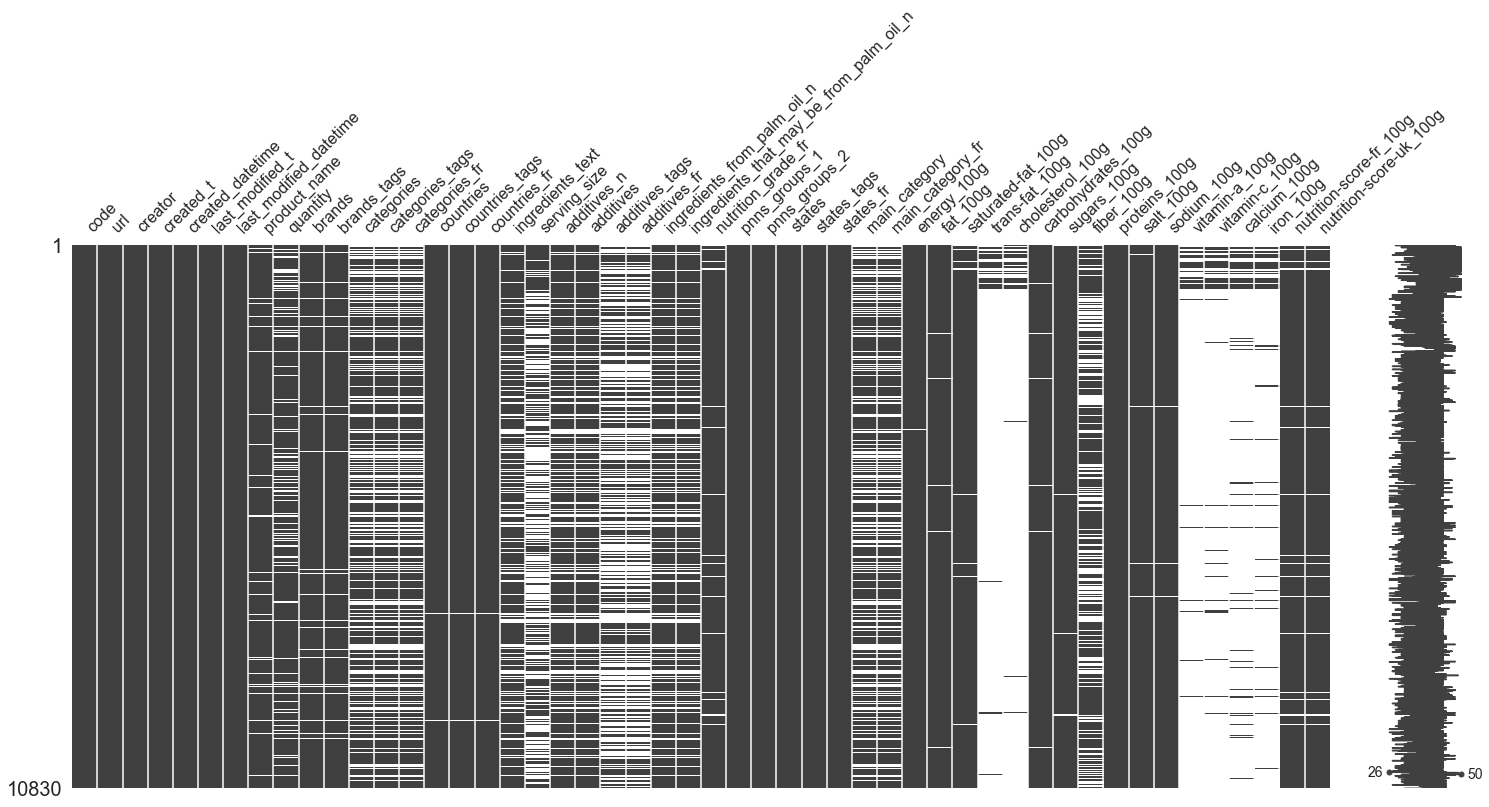

In [34]:
msno.matrix(dfDense[dfDense["pnns_groups_1"] == 'unknown'])

Comme on le voit dans le graphique ci-dessus, même si certaines des features sont presque vides, la plupart sont bien remplies. On ne peut donc pas supprimer ces enregistrements.

In [35]:
element_hist, edges = np.histogram(dfDense["cholesterol_100g"], bins = 10, range = [0, 0.2])
elements = pd.DataFrame({'cho_content': element_hist, 'left': edges[:-1], 'right': edges[1:]})
# Add a column showing the extent of each interval
elements['f_interval'] = [str(left)+" to "+str(right)+" grammes"for left, right in zip(elements['left'], elements['right'])]
elements

,cho_content,left,right,f_interval
0,107421,0.00,0.02,0.0 to 0.02 grammes
1,11378,0.02,0.04,0.02 to 0.04 grammes
2,7761,0.04,0.06,0.04 to 0.06 grammes
3,7011,0.06,0.08,0.06 to 0.08 grammes
4,4031,0.08,0.10,0.08 to 0.1 grammes
5,3961,0.10,0.12,0.1 to 0.12 grammes
6,742,0.12,0.14,0.12 to 0.14 grammes
7,528,0.14,0.16,0.14 to 0.16 grammes
8,177,0.16,0.18,0.16 to 0.18 grammes
9,164,0.18,0.20,0.18 to 0.2 grammes


In [36]:
# Convert dataframe to column data source
src = ColumnDataSource(elements)
src.data.keys()

p = figure(plot_height = 500, plot_width = 500, title = 'Histogram of cholesterol item content',
          x_axis_label = 'cholesterol (g)]', 
           y_axis_label = 'Number of items')
# Add a quad glyph with source this time
p.quad(bottom=0, top='cho_content', left='left', right='right', source=src,
       fill_color='red', line_color='black', fill_alpha = 0.75,
       hover_fill_alpha = 1.0, hover_fill_color = 'navy')

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Cholesterol content', '@f_interval'), ('Num of items', '@cho_content')])

# Add the hover tool to the graph
p.add_tools(hover)


# Show the plot
show(p)

Problème, il ne reste plus beaucoup d'enregistrements si on supprime toutes les lignes qui ont un NaN...<br>
On peut donc seulement supprimer les enregistrements là où les colonnes sont très remplies.

<u>CREATION DES 3 DATASETS</u> :<br>
1- Premier jeu sans outiliers<br>
2- Deuxième jeu sans outiliers et sans NaNs<br>
3- Troisième jeu sans outiliers et avec NaNs remplacés

In [57]:
ingredients_to_remove = ['energy_100g', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']
ingredients = [i for i in list(dfDense_quant.columns) if i not in ingredients_to_remove]
ingredients

['fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g']

1- Premier jeu sans outiliers<br>

In [37]:
dfDense.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0


2- Deuxième jeu sans outiliers et sans NaNs

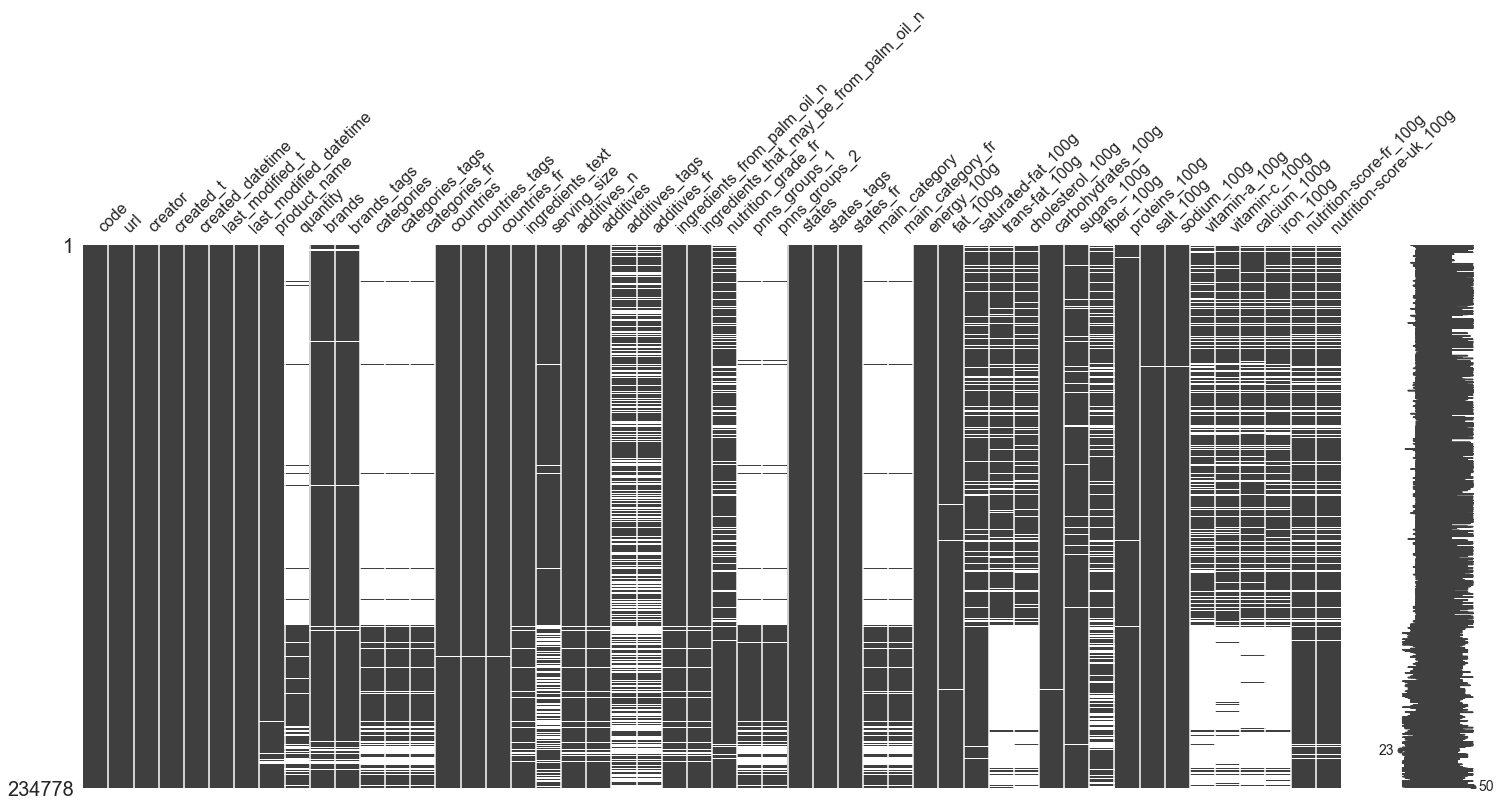

In [38]:
msno.matrix(dfDense)

Supprimer les enregistrements sans discernement mène à une impasse, le nombre d'enregistrements étant trop restreint ! 

In [39]:
dfOriginel[['categories', 'categories_tags', 'main_category', 'pnns_groups_1', 'pnns_groups_2', 'sodium_100g', 'vitamin-a_100g']]

,categories,categories_tags,main_category,pnns_groups_1,pnns_groups_2,sodium_100g,vitamin-a_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.000,0.0
2,NaN,NaN,NaN,NaN,NaN,0.250,0.0
3,NaN,NaN,NaN,NaN,NaN,0.482,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,NaN,NaN,NaN,NaN,NaN,0.000,0.0
320769,Potato chips,"en:salty-snacks,en:appetizers,en:chips-and-fri...",en:chips-and-fries,Salty snacks,Appetizers,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
print(dfDense.shape)
dfDenseNoNaN = dfDense.copy()
dfDenseNoNaN.dropna(inplace = True)
print(dfDenseNoNaN.shape)

(234778, 50)
(518, 50)


Ne supprimer les lignes que là où il y a des NaNs dans les features vraiment importantes pour un modèle de prévision de score par exemple améliore nettement le nombre de lignes restantes !

In [41]:
ingredients_to_remove = ['energy_100g', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']
ingredients = [i for i in list(dfDense_quant.columns) if i not in ingredients_to_remove]
dfDense_100g = dfDense_quant[ingredients]
print(dfDense_100g.shape)
dfDense_100g.dropna(inplace = True)
print(dfDense_100g.shape)

(234778, 14)
(126378, 14)


In [42]:
dfDenseNoNaN = dfDense.loc[dfDense_100g.index]
print(dfDenseNoNaN.shape)

(126378, 50)


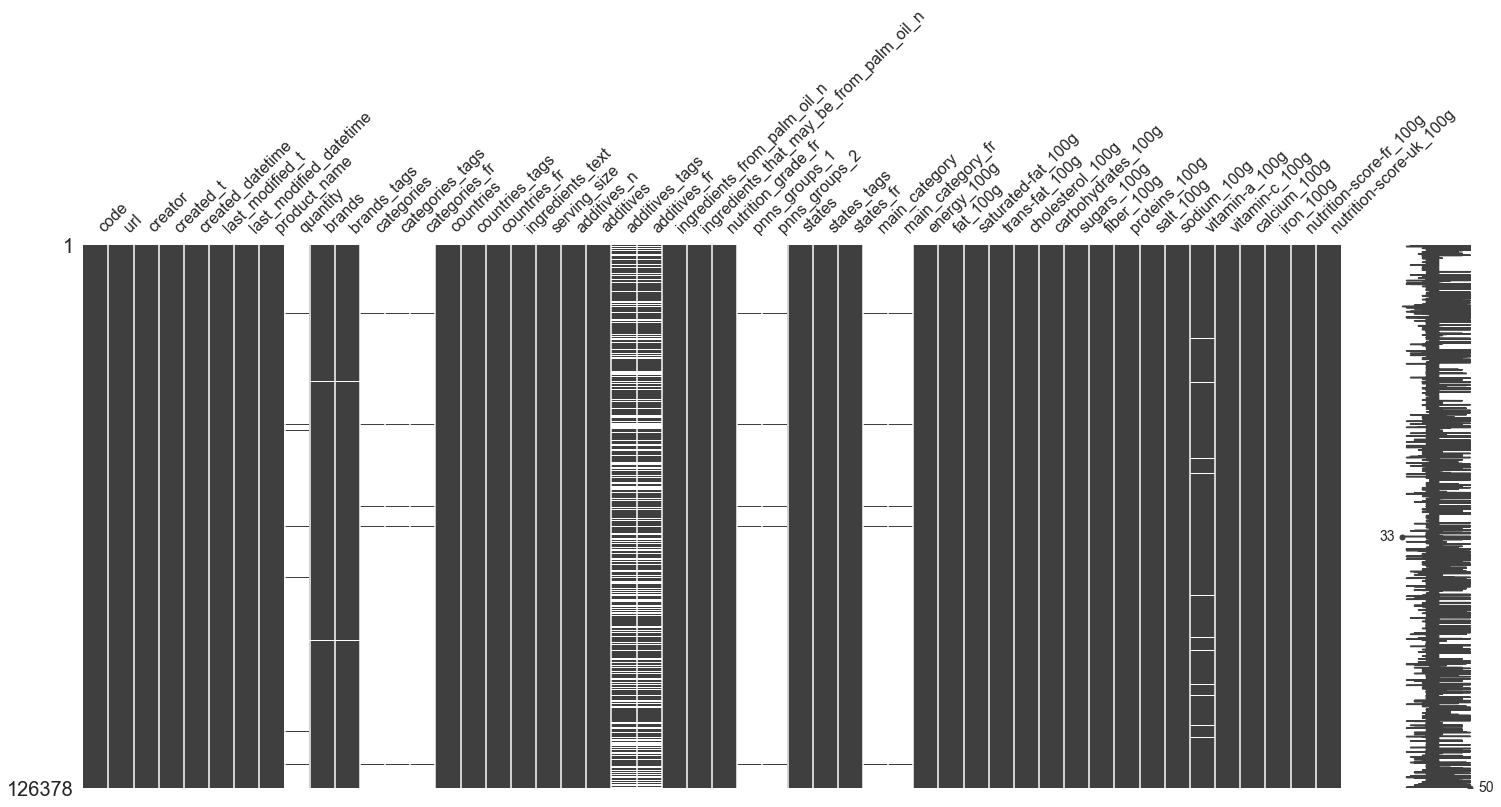

In [43]:
msno.matrix(dfDenseNoNaN)

3- Troisième jeu sans outiliers et avec NaNs remplacés

Pour palier le problème de décalage entre les 100_g et les catégories, je reprends les données initiales qu'on va quand même borner:

In [44]:
dfOriginelBorned = bornification(dfOriginel)

In [67]:
gbc = dfOriginelBorned.groupby(['pnns_groups_1']).size().to_frame(name='counts')
for ingre in ingredients:
    gbc = (gbc.join(gb.agg({ingre: 'mean'})))
gbc = gbc.reset_index()
gbc

,pnns_groups_1,counts,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,Beverages,9033,0.836870,0.513222,0.003066,0.001246,13.006744,11.745616,0.658477,0.882254,0.141001,0.055521,0.019740,0.024972,0.237053,0.001598
1,Cereals and potatoes,8442,6.056666,1.718033,0.017001,0.001811,55.100475,6.815517,5.410838,10.113439,0.652099,0.256735,0.000143,0.020107,0.212603,0.031786
2,Composite foods,6747,7.537920,2.548299,0.055022,0.008809,15.808255,2.425853,2.135144,7.551964,1.126342,0.443438,0.000087,0.005701,0.134844,0.001746
3,Fat and sauces,5214,39.310453,11.575819,0.249293,0.020014,7.982711,5.784318,1.015319,1.856284,1.857358,0.731243,0.003404,0.005033,0.026171,0.000431
4,Fish Meat Eggs,8041,13.686305,4.504472,0.030581,0.089548,2.093741,0.878638,0.782000,18.635904,2.027970,0.798557,0.000432,0.004521,0.124464,0.003611
5,Fruits and vegetables,5908,2.614318,0.868946,0.002609,0.002474,15.972669,12.238771,2.930569,2.175409,0.594423,0.234077,0.002898,0.123081,0.048583,0.026268
6,Milk and dairy products,8825,13.957030,9.156918,0.069015,0.028329,8.836026,7.580187,0.400996,9.676868,0.673868,0.265341,0.000130,0.001410,0.287613,0.000306
7,Salty snacks,2809,30.825235,5.566597,0.191111,0.003945,45.243105,4.750316,4.763267,10.483519,1.515849,0.596784,0.000187,0.007373,0.113762,0.210196
8,Sugary snacks,12363,19.932829,10.031773,0.204832,0.058543,58.577778,41.067537,3.573280,5.412861,0.372615,0.155235,0.000063,0.021639,0.223682,0.014828
9,cereals-and-potatoes,16,1.413333,0.238462,NaN,NaN,22.700000,2.700000,4.000000,5.020000,0.016125,0.006348,NaN,NaN,NaN,NaN


On applique donc ces moyennes aux NaN de dfDense !

In [49]:
dfDenseFilledNaN = dfDense.copy()
#dfDenseFilledNaN = dfDenseFilledNaN[~dfDenseFilledNaN['pnns_groups_1'].isna()]
dfDenseFilledNaN = dfDenseFilledNaN.head(10)
dfDenseFilledNaN['sodium_100g'] = dfDenseFilledNaN.groupby('pnns_groups_1')['sodium_100g'].apply(lambda x: x.fillna(x.mean()))
dfDenseFilledNaN

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,NaN,0.0,0.0214,0.000,0.00129,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,NaN,0.0,0.0000,0.071,0.00129,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,NaN,NaN,NaN,0.143,0.00514,12.0,12.0
5,16100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,Unfi,unfi,NaN,NaN,NaN,US,en:united-states,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,NaN
7,16124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,Daddy's Muesli,daddy-s-muesli,NaN,NaN,NaN,US,en:united-states,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,"en:e123,en:e307a","E123 - Amarante,E307a - Tocophérol",0.0,0.0,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1833.0,18.75,4.69,NaN,NaN,57.81,15.62,9.4,14.06,0.13970,NaN,NaN,NaN,0.062,0.00422,7.0,7.0
8,16193,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489

In [74]:
def fillnaIngred(row, ing):
    #print(ing)
    #print(row)
    if (np.isnan(row[ing])):
        #print("JUSTE AVANT")
        #print(gbc[gbc['pnns_groups_1'] == row['pnns_groups_1']][ing])
        return gbc[gbc['pnns_groups_1'] == row['pnns_groups_1']][ing].iloc[0]
    else:
        return row[ing]

dfDenseFilledNaN = dfDense.copy()
print(dfDenseFilledNaN.shape)
dfDenseFilledNaN = dfDenseFilledNaN[~dfDenseFilledNaN['pnns_groups_1'].isna()]
print(dfDenseFilledNaN.shape)
for ingred in ingredients:
    ingredTab = [ingred]
    dfDenseFilledNaN[ingred] = dfDenseFilledNaN.apply(fillnaIngred, axis=1, args=ingredTab)
dfDenseFilledNaN

(234778, 50)
(60665, 50)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
106,36252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,Sunridge,sunridge,NaN,NaN,NaN,"France, US","en:france,en:united-states","France,États-Unis","Milk chocolate coating (evaporated cane juice,...",40 g (0.25 cup),1.0,[ milk-chocolate-coating -> en:milk-chocolate...,en:e322,E322 - Lécithines,0.0,0.0,e,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,1883.0,20.00,12.500000,0.091987,0.012000,70.00,57.50,2.50,2.500,0.09652,0.038000,0.038212,0.267764,0.100000,0.000900,22.0,22.0
174,290616,http://world-fr.openfoodfacts.org/produit/0000...,b7,1484605978,2017-01-16T22:32:58Z,1484606542,2017-01-16T22:42:22Z,Salade Cesar,0.980 kg,Kirkland Signature,kirkland-signature,Légumes-feuilles,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",Canada,en:canada,Canada,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,100 g,0.0,[ ingredients -> fr:ingredients ] [ laitue-...,NaN,NaN,0.0,0.0,c,Fruits and vegetables,Vegetables,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:fresh-vegetables,Légumes frais,1210.0,12.00,7.000000,0.002609,0.056000,23.00,0.00,2.00,22.000,2.16000,0.850000,0.000000,0.000000,0.000000,0.000000,6.0,6.0
175,394710,http://world-fr.openfoodfacts.org/produit/0000...,b7,1484497370,2017-01-15T16:22:50Z,1484501040,2017-01-15T17:24:00Z,Danoises à la cannelle roulées,1.150 kg,Kirkland Signature,kirkland-signature,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","en:sugary-snacks,en:biscuits-and-cakes,en:past...","Snacks sucrés,Biscuits et gâteaux,Pâtisseries",Canada,en:canada,Canada,"Ingrédients: Pâte (farine, eau, beurre, sucre,...",146 g / 1 danoise,10.0,[ ingredients -> fr:ingredients ] [ pate ->...,"en:e170,en:e300,en:e1100,en:e203,en:e420,en:e4...","E170 - Carbonate de calcium,E300 - Acide ascor...",0.0,1.0,NaN,Sugary snacks,Biscuits and cakes,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,Pâtisseries,1520.0,14.40,10.031773,0.204832,0.041100,54.10,28.10,2.05,4.790,0.92200,0.363000,0.000205,0.006160,0.054800,0.002470,NaN,NaN
180,1938067,http://world-fr.openfoodfacts.org/produit/0000...,b7,1484501528,2017-01-15T17:32:08Z,1484504972,2017-01-15T18:29:32Z,Chaussons tressés aux pommes,1.200 kg,Kirkland Signature,kirkland-signature,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","en:sugary-snacks,en:biscuits-and-cakes,en:past...","Snacks sucrés,Biscuits et gâteaux,Pâtisseries",Canada,en:canada,Canada,"Ingrédients : Pâte (farine, margarines d'huile...",150 g / 1 chausson,5.0,[ ingredients -> fr:ingredients ] [ pate ->...,"en:e920,en:e330,en:e509,en:e211,en:e202","E920 - L-Cystéine et ses chlorhydrates,E330 - ...",0.0,0.0,c,Sugary snacks,Biscuits and cakes,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pastries,Pâtisseries,1090.0,1

In [76]:
print(dfDense.shape)
print(dfDenseNoNaN.shape)
print(dfDenseFilledNaN.shape)

(234778, 50)
(126378, 50)
(60665, 50)


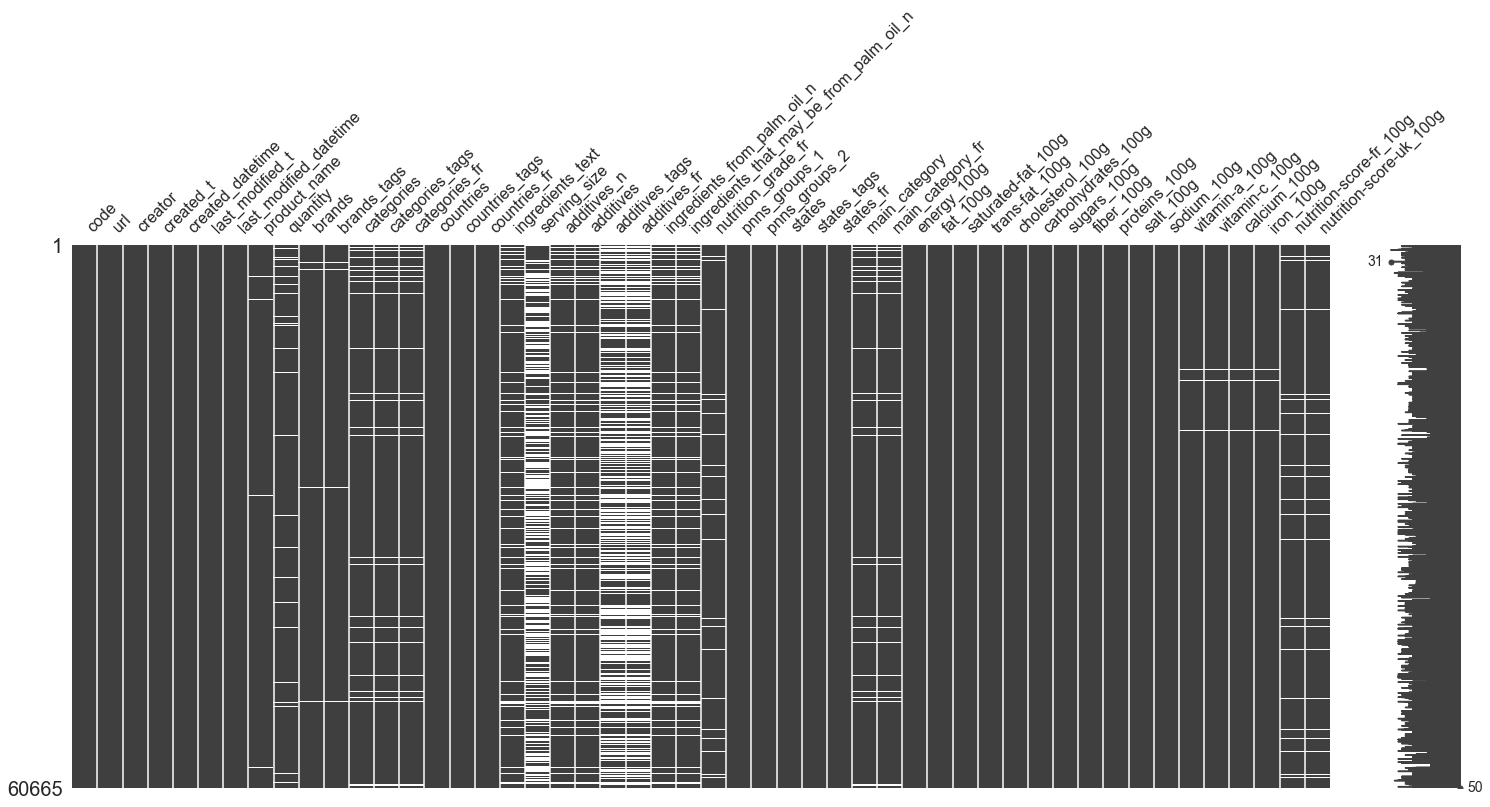

In [77]:
msno.matrix(dfDenseFilledNaN)

In [86]:
dfDenseFilledNaN[dfDenseFilledNaN['vitamin-a_100g'].isna()]['pnns_groups_1'].unique()

array(['sugary-snacks', 'cereals-and-potatoes', 'salty-snacks'],
      dtype=object)

In [45]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

dfDense_quant2 = dfDense_quant.copy()
x = dfDense_quant[dfDense_quant["iron_100g"].notnull()]["iron_100g"].values
y = dfDense_quant2["iron_100g"].fillna(value=dfDense_quant2["iron_100g"].median()).values
print(len(x))
print(len(y))
stats.ks_2samp(x, y)

140270
234778


Ks_2sampResult(statistic=0.2009639230270262, pvalue=0.0)

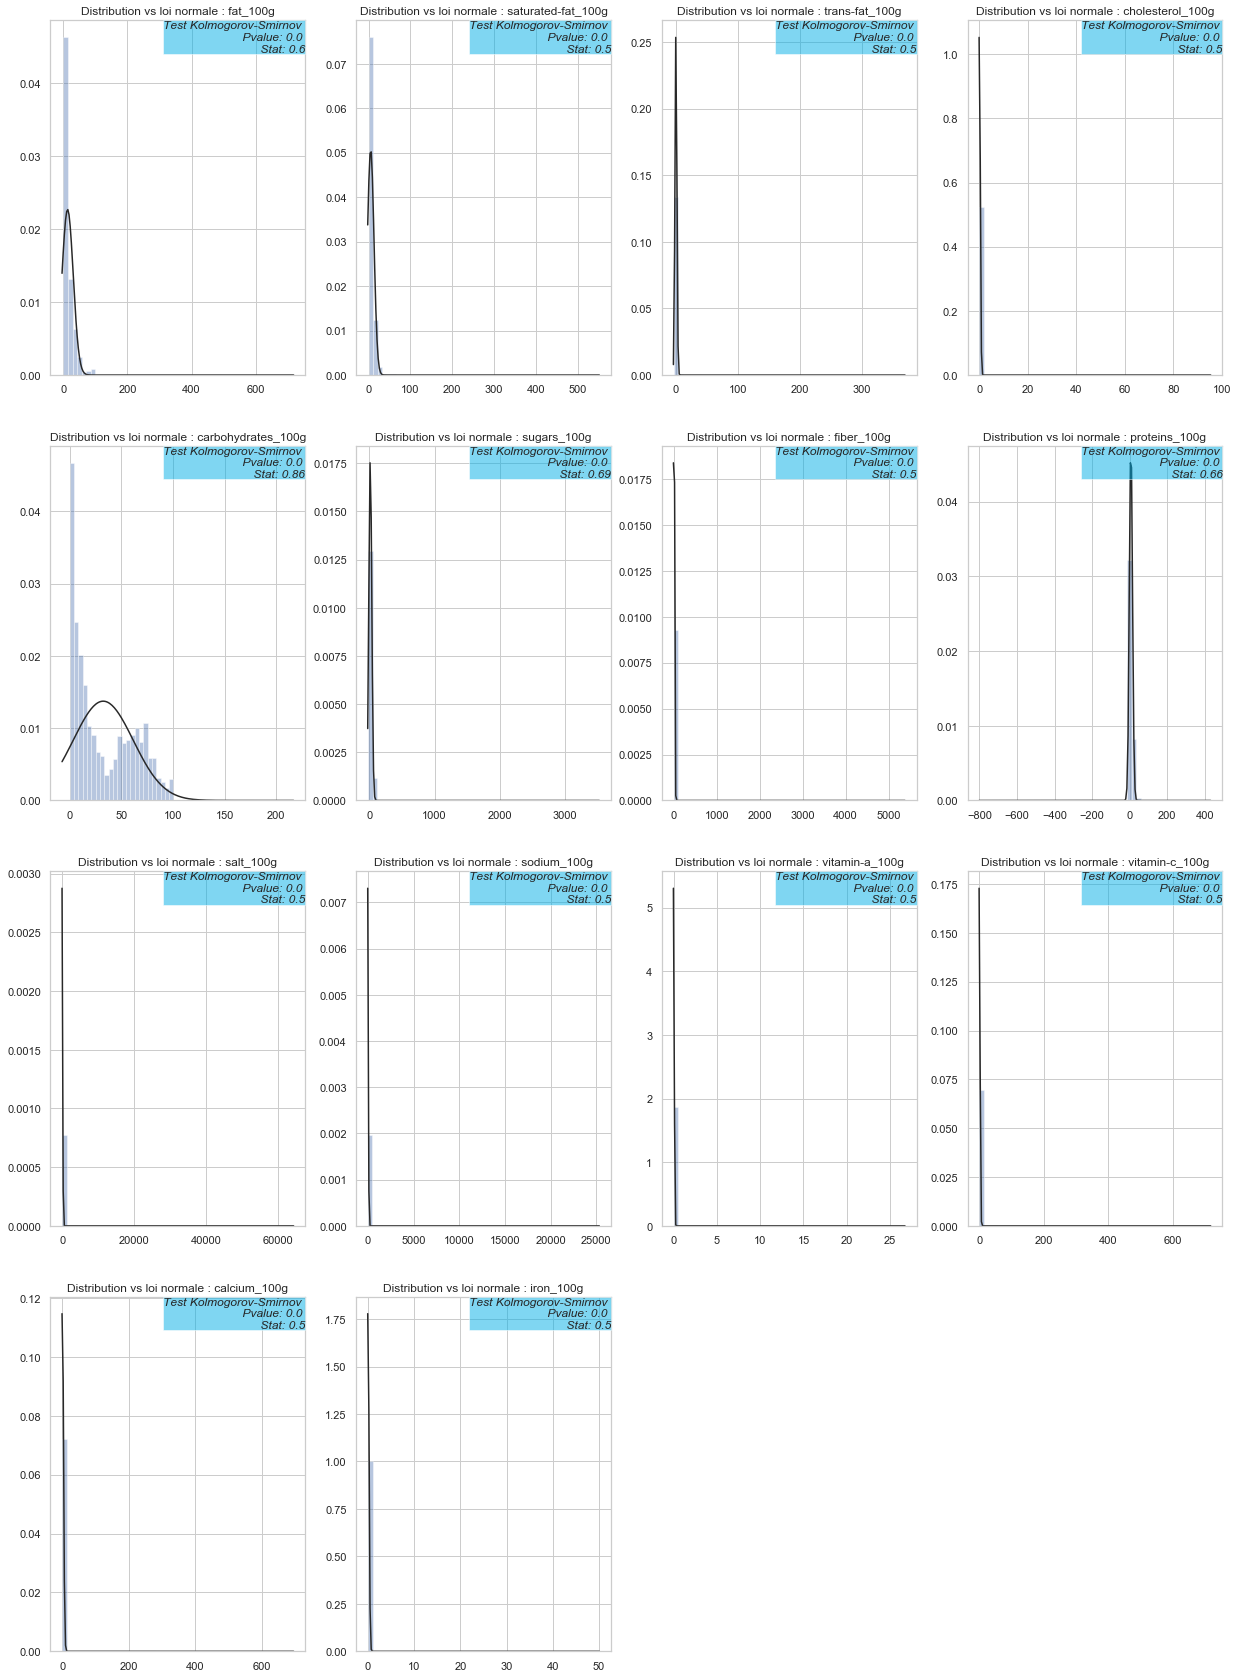

In [113]:


sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))
ingredients_to_remove = ['energy_100g', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']
ingredients = [i for i in list(dfDense_quant.columns) if i not in ingredients_to_remove]

sub = 0
for i in range(len(ingredients)):
    fig.add_subplot(4,4,i+1)
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = ingredients[i]
    kstest = stats.kstest(dfDense_quant[dfDense_quant[colonne].notnull()][colonne].values,'norm')
    ax = sns.distplot(dfDense_quant[dfDense_quant[colonne].notnull()][colonne].values, fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

## 2.3 Identification et gestion des valeurs aberrantes

## 2.4 Identification et gestion des outliers

## 2.5 Analyse univariée des variables catégorielles

## 2.6 Analyse affinée par catégorie d'aliments

# 3. Gestion des NaN

# 4. Matrice de corrélation

# 5. Tests statistiques Anova

# 6. ACP

# 7. Encodage des variables catégorielles

# 8. Standardisation des données et KNN pour prédire le nutriscore

# 9. Détermination du nombre optimal de plus proche voisin et prédiction

In [32]:
df_75_50_qual = df_75_50[df_75_50.dtypes[df_75_50.dtypes == 'object'].index]
df_75_50_qual

,main_category_fr,main_category,categories_tags,categories,categories_fr,pnns_groups_1,pnns_groups_2,quantity,additives_tags,additives_fr,...,states_fr,states_tags,states,url,code,created_datetime,created_t,creator,last_modified_datetime,last_modified_t
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/0000...,4530,2017-03-09T14:32:37Z,1489069957,usda-ndb-import,2017-03-09T14:32:37Z,1489069957
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/0000...,4559,2017-03-09T14:32:37Z,1489069957,usda-ndb-import,2017-03-09T14:32:37Z,1489069957
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/0000...,16087,2017-03-09T10:35:31Z,1489055731,usda-ndb-import,2017-03-09T10:35:31Z,1489055731
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/0000...,16100,2017-03-09T10:34:11Z,1489055651,usda-ndb-import,2017-03-09T10:34:11Z,1489055651
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:e123,en:e307a","E123 - Amarante,E307a - Tocophérol",...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/0000...,16124,2017-03-09T10:35:11Z,1489055711,usda-ndb-import,2017-03-09T10:35:12Z,1489055712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/9787...,9787461062105,2017-03-09T20:45:00Z,1489092300,usda-ndb-import,2017-03-09T20:45:00Z,1489092300
320751,Pains,en:breads,"en:plant-based-foods-and-beverages,en:plant-ba...","Biscottes au sarrasin,Biscottes","Aliments et boissons à base de végétaux,Alimen...",Cereals and potatoes,Bread,NaN,NaN,NaN,...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/9847...,9847548283004,2015-07-25T09:47:06Z,1437817626,drmalabar,2015-09-14T13:37:28Z,1442237848
320756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100gr,NaN,NaN,...,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/9898...,989898,2016-09-12T15:40:09Z,1473694809,openfoodfacts-contributors,2016-09-12T15:40:15Z,1473694815
320763,Thés verts,en:green-teas,"en:plant-based-foods-and-beverages,en:beverage...",thés verts,"Aliments et boissons à base de végétaux,Boisso...",Beverages,Non-sugared beverages,50 g,NaN,NaN,...,"A vérifier,Complet,Informations nutritionnelle...","en:to-be-checked,en:complete,en:nutrition-fact...","en:to-be-checked, en:complete, en:nutrition-fa...",http://world-fr.openfoodfacts.org/produit/9911...,99111250,2013-04-28T15:30:39Z,1367163039,balooval,2013-06-20T01:09:16Z,1371690556


<u>UNIFORMISATION DE LA CASSE DES VARIABLES CATEGORIELLES</u>:

In [33]:
for ft in df_75_50_qual.columns:
    df_75_50[ft] = df_75_50[ft].str.upper()
df_75_50

,main_category_fr,main_category,categories_tags,categories,categories_fr,pnns_groups_1,pnns_groups_2,quantity,vitamin-a_100g,iron_100g,...,states_fr,states_tags,states,url,code,created_datetime,created_t,creator,last_modified_datetime,last_modified_t
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00129,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T14:32:37Z,NaN,USDA-NDB-IMPORT,2017-03-09T14:32:37Z,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00129,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T14:32:37Z,NaN,USDA-NDB-IMPORT,2017-03-09T14:32:37Z,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00514,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T10:35:31Z,NaN,USDA-NDB-IMPORT,2017-03-09T10:35:31Z,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00346,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T10:34:11Z,NaN,USDA-NDB-IMPORT,2017-03-09T10:34:11Z,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00422,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T10:35:11Z,NaN,USDA-NDB-IMPORT,2017-03-09T10:35:12Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00127,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/9787...,9787461062105,2017-03-09T20:45:00Z,NaN,USDA-NDB-IMPORT,2017-03-09T20:45:00Z,NaN
320751,PAINS,EN:BREADS,"EN:PLANT-BASED-FOODS-AND-BEVERAGES,EN:PLANT-BA...","BISCOTTES AU SARRASIN,BISCOTTES","ALIMENTS ET BOISSONS À BASE DE VÉGÉTAUX,ALIMEN...",CEREALS AND POTATOES,BREAD,NaN,NaN,0.00380,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/9847...,9847548283004,2015-07-25T09:47:06Z,NaN,DRMALABAR,2015-09-14T13:37:28Z,NaN
320756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100GR,NaN,NaN,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/9898...,989898,2016-09-12T15:40:09Z,NaN,OPENFOODFACTS-CONTRIBUTORS,2016-09-12T15:40:15Z,NaN
320763,THÉS VERTS,EN:GREEN-TEAS,"EN:PLANT-BASED-FOODS-AND-BEVERAGES,EN:BEVERAGE...",THÉS VERTS,"ALIMENTS ET BOISSONS À BASE DE VÉGÉTAUX,BOISSO...",BEVERAGES,NON-SUGARED BEVERAGES,50 G,NaN,NaN,...,"A VÉRIFIER,COMPLET,INFORMATIONS NUTRITIONNELLE...","EN:TO-BE-CHECKED,EN:COMPLETE,EN:NUTRITION-FACT...","EN:TO-BE-CHECKED, EN:COMPLETE, EN:NUTRITION-FA...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/9911...,99111250,2013-04-28T15:30:39Z,NaN,BALOOVAL,2013-06-20T01:09:16Z,NaN


In [34]:
len(df_75_50['main_category'].unique())

1944

In [35]:
https://www.projectpro.io/recipes/select-features-using-best-anova-f-values-in-python

SyntaxError: invalid syntax (<ipython-input-35-468a98681b0c>, line 1)

In [36]:
df_75_50_qual = df_75_50[df_75_50.dtypes[df_75_50.dtypes == 'object'].index]
df_75_50_qual

,main_category_fr,main_category,categories_tags,categories,categories_fr,pnns_groups_1,pnns_groups_2,quantity,additives_tags,additives_fr,...,states_fr,states_tags,states,url,code,created_datetime,created_t,creator,last_modified_datetime,last_modified_t
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T14:32:37Z,NaN,USDA-NDB-IMPORT,2017-03-09T14:32:37Z,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T14:32:37Z,NaN,USDA-NDB-IMPORT,2017-03-09T14:32:37Z,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T10:35:31Z,NaN,USDA-NDB-IMPORT,2017-03-09T10:35:31Z,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T10:34:11Z,NaN,USDA-NDB-IMPORT,2017-03-09T10:34:11Z,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EN:E123,EN:E307A","E123 - AMARANTE,E307A - TOCOPHÉROL",...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/0000...,NaN,2017-03-09T10:35:11Z,NaN,USDA-NDB-IMPORT,2017-03-09T10:35:12Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/9787...,9787461062105,2017-03-09T20:45:00Z,NaN,USDA-NDB-IMPORT,2017-03-09T20:45:00Z,NaN
320751,PAINS,EN:BREADS,"EN:PLANT-BASED-FOODS-AND-BEVERAGES,EN:PLANT-BA...","BISCOTTES AU SARRASIN,BISCOTTES","ALIMENTS ET BOISSONS À BASE DE VÉGÉTAUX,ALIMEN...",CEREALS AND POTATOES,BREAD,NaN,NaN,NaN,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/9847...,9847548283004,2015-07-25T09:47:06Z,NaN,DRMALABAR,2015-09-14T13:37:28Z,NaN
320756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100GR,NaN,NaN,...,"A COMPLÉTER,INFORMATIONS NUTRITIONNELLES COMPL...","EN:TO-BE-COMPLETED,EN:NUTRITION-FACTS-COMPLETE...","EN:TO-BE-COMPLETED, EN:NUTRITION-FACTS-COMPLET...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/9898...,989898,2016-09-12T15:40:09Z,NaN,OPENFOODFACTS-CONTRIBUTORS,2016-09-12T15:40:15Z,NaN
320763,THÉS VERTS,EN:GREEN-TEAS,"EN:PLANT-BASED-FOODS-AND-BEVERAGES,EN:BEVERAGE...",THÉS VERTS,"ALIMENTS ET BOISSONS À BASE DE VÉGÉTAUX,BOISSO...",BEVERAGES,NON-SUGARED BEVERAGES,50 G,NaN,NaN,...,"A VÉRIFIER,COMPLET,INFORMATIONS NUTRITIONNELLE...","EN:TO-BE-CHECKED,EN:COMPLETE,EN:NUTRITION-FACT...","EN:TO-BE-CHECKED, EN:COMPLETE, EN:NUTRITION-FA...",HTTP://WORLD-FR.OPENFOODFACTS.ORG/PRODUIT/9911...,99111250,2013-04-28T15:30:39Z,NaN,BALOOVAL,2013-06-20T01:09:16Z,NaN


In [37]:
for n in range(df_75_50_qual.shape[1]):
    print(df_75_50_qual.columns[n] + " : "+str(len(df_75_50_qual[df_75_50_qual.columns[n]].unique())))

main_category_fr : 1944
main_category : 1944
categories_tags : 14440
categories : 24480
categories_fr : 14440
pnns_groups_1 : 15
pnns_groups_2 : 38
quantity : 8257
additives_tags : 36302
additives_fr : 36302
serving_size : 23472
nutrition_grade_fr : 6
additives : 169737
ingredients_text : 176581
brands_tags : 34707
brands : 36792
product_name : 152457
countries_tags : 496
countries : 870
countries_fr : 496
states_fr : 471
states_tags : 471
states : 471
url : 218269
code : 16261
created_datetime : 105740
created_t : 2238
creator : 2170
last_modified_datetime : 101072
last_modified_t : 2229


In [ ]:
Question : cela vaut-il la peine de faire un decode quand il y a autant de modalités ? à part pour pnns_groups_1, pnns_groups_2 et nutrition_grade_fr ?

In [38]:
df_75_50_qual['pnns_groups_1'].unique()

array([nan, 'UNKNOWN', 'FRUITS AND VEGETABLES', 'SUGARY SNACKS',
       'COMPOSITE FOODS', 'BEVERAGES', 'FISH MEAT EGGS',
       'CEREALS AND POTATOES', 'MILK AND DAIRY PRODUCTS',
       'FAT AND SAUCES', 'SALTY SNACKS', 'FRUITS-AND-VEGETABLES',
       'SUGARY-SNACKS', 'CEREALS-AND-POTATOES', 'SALTY-SNACKS'],
      dtype=object)

In [ ]:
Qu'est-ce qu'une super catégorie ? 

In [ ]:
ANOVA:
    https://www.reneshbedre.com/blog/anova.html

In [ ]:
https://www.reneshbedre.com/blog/anova.html

In [39]:
df_75_50_quant = df_75_50[df_75_50.dtypes[df_75_50.dtypes == 'float64'].index]
df_75_50_quant

,vitamin-a_100g,iron_100g,vitamin-c_100g,calcium_100g,trans-fat_100g,cholesterol_100g,fiber_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,sugars_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,sodium_100g,salt_100g,proteins_100g,energy_100g
1,0.0,0.00129,0.0214,0.000,0.0,0.018,3.6,14.0,14.0,28.57,64.29,28.57,14.29,0.0,0.0,0.0,0.000000,0.00000,3.57,2243.0
2,0.0,0.00129,0.0000,0.071,0.0,0.000,7.1,0.0,0.0,0.00,60.71,17.86,17.86,0.0,0.0,0.0,0.250000,0.63500,17.86,1941.0
3,NaN,0.00514,NaN,0.143,NaN,NaN,7.1,12.0,12.0,5.36,17.86,57.14,3.57,0.0,0.0,0.0,0.482000,1.22428,17.86,2540.0
5,NaN,0.00346,NaN,0.038,NaN,NaN,7.7,NaN,NaN,1.92,63.46,18.27,11.54,0.0,0.0,0.0,NaN,NaN,13.46,1933.0
7,NaN,0.00422,NaN,0.062,NaN,NaN,9.4,7.0,7.0,4.69,57.81,18.75,15.62,0.0,2.0,0.0,0.055000,0.13970,14.06,1833.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320742,0.0,0.00127,0.0000,0.000,0.0,0.000,4.7,-1.0,-1.0,0.00,87.06,0.00,2.35,0.0,0.0,0.0,0.012000,0.03048,1.18,1477.0
320751,NaN,0.00380,NaN,NaN,NaN,NaN,5.9,-4.0,-4.0,0.60,74.80,2.80,2.60,NaN,NaN,NaN,0.267717,0.68000,13.00,1643.0
320756,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,12.20,31.00,9.60,0.0,0.0,0.0,0.433071,1.10000,2.10,569.0
320763,NaN,NaN,NaN,NaN,NaN,NaN,0.2,2.0,0.0,0.20,0.50,0.20,0.50,0.0,0.0,0.0,0.010000,0.02540,0.50,21.0


In [40]:
df_75_50_quantSansNaN = df_75_50_quant.fillna(0)

In [ ]:
passer df_75_50_qual['nutrition_grade_fr'] en numérique

In [42]:
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6})#,np.nan:'NY'}, na_action=None)
df_75_50_qual['nutrition_grade_fr']

NameError: name 'df' is not defined

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_Best = SelectKBest(f_classif, k=5)
df_75_50_quantSansNaN2 = df_75_50_quantSansNaN.copy()
y = df_75_50_quantSansNaN2['nutrition_grade_fr']
X = df_75_50_quantSansNaN2.drop(['nutrition_grade_fr'])
X_kbest = fvalue_Best.fit_transform(X, y)
print(X_kbest)


NameError: name 'df_75_50_quantSansNaN' is not defined

In [44]:
def composantesPrincipale(dfNormalise, dfNonNormalise, nombre_composantes, numero_composante):
    """Affichage des dix premières variables importantes d'une composante principale de l'ACP
    Arguments:
    dfNormalise -- dataframe contenant les variables normalisées pour l'ACP
    dfNonNormalise -- dataframe contenant les variables non normalisées
    composante -- numéro de la composante principale à afficher
    """
    pca = PCA(n_components=nombre_composantes).fit(prep.scale(dfNormalise)) 

    pca_df = pd.DataFrame(pca.components_[numero_composante])
    pca_df.columns = ['coeff']

    feat_pca = pd.DataFrame(dfNonNormalise.columns.values)
    feat_pca.columns = ['features']

    pca_feat_importances = pd.merge(feat_pca,pca_df,left_index=True,right_index=True)
    pca_feat_importances['importances']= pca_feat_importances['coeff']/pca_feat_importances['coeff'].sum()*100
    pca_feat_importances['importances'] = pca_feat_importances['importances'].apply(lambda x:abs(int(x)))
    print(pca_feat_importances.sort_values(['importances'], ascending=[0]).head(10))
    
def ACP(dfContinuesSkewedSansNaN):
    dfContinuesSkewedSansNaNNormalise = prep.StandardScaler().fit_transform(dfContinuesSkewedSansNaN)
    print("Variables de la première composante principale de l'ACP :")
    composantesPrincipale(dfContinuesSkewedSansNaNNormalise, dfContinuesSkewedSansNaN, 3, 0)
    print("Variables de la deuxième composante principale de l'ACP :")
    composantesPrincipale(dfContinuesSkewedSansNaNNormalise, dfContinuesSkewedSansNaN, 3, 1)
    print("Variables de la troisième composante principale de l'ACP :")
    composantesPrincipale(dfContinuesSkewedSansNaNNormalise, dfContinuesSkewedSansNaN, 3, 2)
    return dfContinuesSkewedSansNaNNormalise
df_75_50_quantSansNaN = df_75_50_quant.fillna(0)
df_75_50_quantNormalise = ACP(df_75_50_quantSansNaN)

NameError: name 'prep' is not defined

In [45]:
def getPropre(df, graphe):
    """Méthode permettant d'obtenir les valeurs propres et les vecteurs propres de la matrice de corrélation, affiche également le graphe de la participation de chaque variable à l'explication de la variance
    Arguments:
    df -- dataframe contenant les variables
    graphe -- booléen indiquant si on veut que le graphe soit affiché ou non
    Retour: la liste des tuples (valeurs propres, vecteurs propres)
    """
    
    cor_mat1 = np.corrcoef(df.T)
    eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    if graphe:
        with plt.style.context('seaborn-whitegrid'):
            plt.clf()
            plt.figure(figsize=(10, 6))
            plt.bar(range(df.shape[1]), var_exp, alpha=0.5, align='center',
                    label='Variance expliquee individuellement')
            plt.step(range(df.shape[1]), cum_var_exp, where='mid',
                     label='Variance expliquee par cumul')
            plt.ylabel('Pourcentage de variance expliquee')
            plt.xlabel('Composantes principales')
            plt.legend(loc='best')
            plt.tight_layout()
            plt.show()    
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    
    return eig_pairs

eig_pairs = getPropre(df_75_50_quantNormalise, True)
eig_pairsSorted = sorted(eig_pairs, key=lambda x:x[0], reverse=True)
for i in range(4):
    print("{0}\t{1}\t{2}\t{3}\t{4}".format(eig_pairsSorted[5*i][0], eig_pairsSorted[5*i+1][0], eig_pairsSorted[5*i+2][0], eig_pairsSorted[5*i+3][0], eig_pairsSorted[5*i+4][0]))

NameError: name 'df_75_50_quantNormalise' is not defined

In [ ]:
from sklearn.decomposition import PCA    
import sklearn.preprocessing as prep
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import time

def getDfContinuesNormalise(_df):
    df = _df.copy() 
    df = df.fillna(0)
    dfNormalise = prep.StandardScaler().fit_transform(df)
    return dfNormalise
def graphe_KMeans(_df, _nb_clusters): #dfContinuesSkewedSansNaN

    deb = time.clock()
    
    reduced_data = PCA(n_components=2).fit_transform(_df)
    kmeans = KMeans(init='k-means++', n_clusters=_nb_clusters, n_init=10)
    kmeans.fit(reduced_data)
    fin1 = time.clock()
    h = 0.1     # point in the mesh [x_min, x_max]x[y_min, y_max].

    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    centroids = kmeans.cluster_centers_
    print("centroids = ",centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title('K-means clustering on Marmite dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    fin2 = time.clock()
    print("Temps d'exécution du KMeans : {0}".format(fin1-deb))
    print("Temps d'exécution graphe : {0}".format(fin2-fin1))
    print("Inertie du K-means : {0}".format(kmeans.inertia_))
df_75_50_quantNormalise = getDfContinuesNormalise(df_75_50_quant)

#predict_lieu_vente = np.where(dfOriginel["countries_tags"].str.contains("en:france|en:french|en:new-caledonia|en:guadeloupe|en:martinique|en:reunion|en:saint-pierre-and-miquelon")==True, "FR", "PASFR")
graphe_KMeans(df_75_50_quantNormalise, 3)

In [28]:
def graphesDiminutionAsymetrie(_df):
    dfOriginelSans100NaN = pd.DataFrame()
    co = _df.count()
    i = 0
    while i < _df.shape[1]:
        if co[i] > 0:
            dfOriginelSans100NaN.insert(dfOriginelSans100NaN.shape[1], _df.columns[i], _df[_df.columns[i]])
        i = i + 1
    dfContinues = pd.DataFrame()
    dfNonContinues = pd.DataFrame()

    i = 0
    while i < dfOriginelSans100NaN.shape[1]:
        if dfOriginelSans100NaN.dtypes[i] == np.float64:
            dfContinues.insert(dfContinues.shape[1], dfOriginelSans100NaN.columns[i], dfOriginelSans100NaN[dfOriginelSans100NaN.columns[i]])
        else:
            dfNonContinues.insert(dfNonContinues.shape[1], dfOriginelSans100NaN.columns[i], dfOriginelSans100NaN[dfOriginelSans100NaN.columns[i]])
        i = i + 1
    dfNanContinues = 100*(1-dfContinues.count()/dfContinues.shape[0])

    tabSkewness = []
    co = dfContinues.count()
    X = []
    Y = []
    i = 0
    while i < dfContinues.shape[1]:    
        if ~np.isnan(dfContinues[dfContinues.columns[i]].skew()):
            tabSkewness.append((dfContinues.columns[i], dfContinues[dfContinues.columns[i]].skew(), dfNanContinues[dfContinues.columns[i]], co[i]))
            Y.append(dfContinues[dfContinues.columns[i]].skew())
            X.append(co[i])
        i = i + 1
    tabSkewnessSorted = sorted(tabSkewness, key=lambda x:x[1])
    dfContinuesSkewed = pd.DataFrame()
    i = 0
    while i < len(tabSkewnessSorted):
        dfContinuesSkewed.insert(dfContinuesSkewed.shape[1], tabSkewnessSorted[i][0], _df[tabSkewnessSorted[i][0]])
        i = i + 1
        
    dfContinuesSkewed['proteins_100g'][15666666666] = 0
    dfContinuesSkewed['fat_100g'][15666666666] = 0
    dfContinuesSkewed['carbohydrates_100g'][15666666666] = 0         

    tabRatLog = []
    tabRatRac = []

    for i in range(dfContinuesSkewed.shape[1]):
        skewNorm = dfContinuesSkewed[dfContinuesSkewed.columns[i]].skew()   # skew variable originelle X
        logcol = np.log(1+dfContinuesSkewed[dfContinuesSkewed.columns[i]])  # variable log(1 + X)
        skewLog = logcol.skew()                                             # skew variable log(1 + X)
        sqrtcol = np.sqrt(dfContinuesSkewed[dfContinuesSkewed.columns[i]])  # variable sqrt(X)
        skewRac = sqrtcol.skew()                                            # skew variable sqrt(X)
        ratLog = np.abs(skewLog/skewNorm)                                   # ratio skewLog/skewNorm
        tabRatLog.append(np.log(ratLog))
        ratRac = np.abs(skewRac/skewNorm)                                   # ratio skewRac/skewNorm
        tabRatRac.append(np.log(ratRac))
    plt.clf()
    plt.figure(1)
    x = np.arange(dfContinuesSkewed.shape[1])
    y = tabRatLog
    plt.title("Transformation de l'asymetrie avec la fonction logarithmique")
    plt.xlabel('variables avec skew')
    plt.ylabel('log du ratio pour fct log')
    plt.plot(x,y,'g')
    plt.plot([0, dfContinuesSkewed.shape[1]-1], [0,0], 'r-', lw=2)
    plt.show()
    plt.figure(2)
    x = np.arange(dfContinuesSkewed.shape[1])
    y = tabRatRac
    plt.xlabel('variables avec skew')
    plt.ylabel('log du ratio pour fct sqrt')
    plt.plot(x,y,'b')
    plt.plot([0, dfContinuesSkewed.shape[1]-1], [0,0], 'r-', lw=2)
    plt.title("Transformation de l'asymetrie avec la fonction racine carree")
    plt.show()   
    
    return dfContinuesSkewed

df_75_50Skewed = graphesDiminutionAsymetrie(df_75_50)